<a href="https://colab.research.google.com/github/anjali88/HFT-ML/blob/master/FEB__AIHFT_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mxnet

In [ ]:
pip install utils

In [ ]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
print(tf.__version__)

1.14.0


In [ ]:
import pandas as pd
import numpy as np
import mxnet as mx
import time
import datetime
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from pylab import rcParams
from tqdm import tqdm_notebook

#Normalising imports
from sklearn.preprocessing import StandardScaler

# Modelling imports
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
import xgboost as xgb
from xgboost import XGBRegressor

#Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

#Setting up mxnet model Need this to create an ARIMA model and Fourier series model easily
context = mx.cpu(); model_ctx=mx.cpu()
mx.random.seed(1719)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##DATA ACQUISITION



In [ ]:
from google.colab import files
uploaded1 = files.upload()
uploaded2 =files.upload()
uploaded3 = files.upload()
uploaded4 = files.upload()
uploaded5 = files.upload()
uploaded6 = files.upload()
uploaded7 = files.upload()
uploaded8 = files.upload()
uploaded9 = files.upload()
uploaded10 = files.upload()

Saving RDSB_FEB.xlsx to RDSB_FEB.xlsx


Saving ULVR_FEB.xlsx to ULVR_FEB.xlsx


Saving HSBC_FEB.xlsx to HSBC_FEB.xlsx


Saving BP_FEB.xlsx to BP_FEB.xlsx


Saving GSK_FEB.xlsx to GSK_FEB.xlsx


Saving LLOY_FEB.xlsx to LLOY_FEB.xlsx


Saving AZN_FEB.xlsx to AZN_FEB.xlsx


Saving TSCO_FEB.xlsx to TSCO_FEB.xlsx


Saving AAL_FEB.xlsx to AAL_FEB.xlsx


Saving DGE_FEB.xlsx to DGE_FEB.xlsx


##Data Visualisation

In [ ]:
import io
dataset_ex_df_RDSB = pd.read_excel(io.BytesIO(uploaded1['RDSB_FEB.xlsx']))
print('RDSB Dataset')
print(dataset_ex_df_RDSB.head())

dataset_ex_df_ULVR = pd.read_excel(io.BytesIO(uploaded2['ULVR_FEB.xlsx']))
print('\n ULVR Dataset')
print(dataset_ex_df_ULVR.head())

dataset_ex_df_HSBC = pd.read_excel(io.BytesIO(uploaded3['HSBC_FEB.xlsx']))
print('\n HSBC Dataset')
print(dataset_ex_df_HSBC.head())

dataset_ex_df_BP = pd.read_excel(io.BytesIO(uploaded4['BP_FEB.xlsx']))
print('\n BP Dataset')
print(dataset_ex_df_BP.head())

dataset_ex_df_GSK = pd.read_excel(io.BytesIO(uploaded5['GSK_FEB.xlsx']))
print('\n GSK Dataset')
print(dataset_ex_df_GSK.head())

dataset_ex_df_LLOY = pd.read_excel(io.BytesIO(uploaded6['LLOY_FEB.xlsx']))
print('\n LLOY Dataset')
print(dataset_ex_df_LLOY.head())

dataset_ex_df_AZN = pd.read_excel(io.BytesIO(uploaded7['AZN_FEB.xlsx']))
print('\n AZN Dataset')
print(dataset_ex_df_AZN.head())

dataset_ex_df_TSCO = pd.read_excel(io.BytesIO(uploaded8['TSCO_FEB.xlsx']))
print('\n TSCO Dataset')
print(dataset_ex_df_TSCO.head())

RDSB Dataset
                Dates    Open   Close    High     Low       Value  Volume
0 2018-02-14 08:00:00  2319.0  2315.5  2319.0  2315.5  64152800.0   27677
1 2018-02-14 08:01:00  2316.5  2314.0  2316.5  2312.5  39831632.0   17206
2 2018-02-14 08:02:00  2311.5  2306.0  2312.0  2305.0  38951624.0   16871
3 2018-02-14 08:03:00  2306.5  2306.5  2309.5  2305.0  33872616.0   14683
4 2018-02-14 08:04:00  2309.0  2309.0  2309.0  2308.5   6997242.0    3031

 ULVR Dataset
                Dates    Open   Close    High     Low       Value  Volume
0 2018-02-14 08:00:00  3805.0  3797.5  3806.0  3797.5  37356124.0    9819
1 2018-02-14 08:01:00  3801.0  3800.0  3801.0  3800.0   2485724.0     654
2 2018-02-14 08:02:00  3797.0  3793.0  3797.0  3793.0   2189957.0     577
3 2018-02-14 08:03:00  3796.0  3802.5  3802.5  3795.0   6434300.5    1694
4 2018-02-14 08:04:00  3801.0  3799.5  3803.0  3796.5   8324898.0    2191

 HSBC Dataset
                Dates   Open  Close   High    Low         Value   Vol

In [ ]:
dataset_ex_df_AAL = pd.read_excel(io.BytesIO(uploaded9['AAL_FEB.xlsx']))
print('\n AAL Dataset')
dataset_ex_df_AAL.head()


 AAL Dataset


Dates    Open   Close    High     Low       Value  Volume
0 2018-02-14 08:00:00  1682.0  1679.8  1682.0  1677.6  36935376.0   21978
1 2018-02-14 08:01:00  1679.8  1680.8  1681.6  1678.0  28434078.0   16930
2 2018-02-14 08:02:00  1681.2  1679.0  1681.2  1678.0  24295556.0   14466
3 2018-02-14 08:03:00  1679.0  1675.6  1679.8  1675.4  19602172.0   11683
4 2018-02-14 08:04:00  1674.6  1676.4  1677.4  1674.6  10772108.0    6427

In [ ]:
dataset_ex_df_DGE = pd.read_excel(io.BytesIO(uploaded10['DGE_FEB.xlsx']))
print('\n DGE Dataset')
dataset_ex_df_DGE.head()


 DGE Dataset


Dates    Open   Close    High     Low       Value  Volume
0 2018-02-14 08:00:00  2473.0  2473.0  2474.0  2472.0  92973784.0   37595
1 2018-02-14 08:01:00  2474.0  2474.5  2474.5  2474.0   2642458.5    1068
2 2018-02-14 08:02:00  2476.0  2475.0  2476.0  2475.0  19469766.0    7866
3 2018-02-14 08:03:00  2473.0  2474.0  2474.0  2473.0  10175348.0    4114
4 2018-02-14 08:04:00  2472.0  2475.5  2475.5  2471.5  15807450.0    6391

In [ ]:
print('There are {} number of observations in the RDSB.'.format(dataset_ex_df_RDSB.shape[0]))
print('There are {} number of observations in the ULVR.'.format(dataset_ex_df_ULVR.shape[0]))
print('There are {} number of observations in the HSBC.'.format(dataset_ex_df_HSBC.shape[0]))
print('There are {} number of observations in the BP.'.format(dataset_ex_df_BP.shape[0]))
print('There are {} number of observations in the GSK.'.format(dataset_ex_df_GSK.shape[0]))
print('There are {} number of observations in the LLOY.'.format(dataset_ex_df_LLOY.shape[0]))
print('There are {} number of observations in the AZN.'.format(dataset_ex_df_AZN.shape[0]))
print('There are {} number of observations in the TSCO.'.format(dataset_ex_df_TSCO.shape[0]))
print('There are {} number of observations in the AAL.'.format(dataset_ex_df_AAL.shape[0]))
print('There are {} number of observations in the DGE.'.format(dataset_ex_df_DGE.shape[0]))

There are 5382 number of observations in the RDSB.
There are 5534 number of observations in the ULVR.
There are 5557 number of observations in the HSBC.
There are 5575 number of observations in the BP.
There are 5432 number of observations in the GSK.
There are 5495 number of observations in the LLOY.
There are 4796 number of observations in the AZN.
There are 4478 number of observations in the TSCO.
There are 5574 number of observations in the AAL.
There are 5370 number of observations in the DGE.


In [ ]:
# Describe method is used to view some basic statistical details like percentile, mean, std etc. of a data frame of numeric values.

print('RDSB dataset charactertics')
print(dataset_ex_df_RDSB.describe())
print('ULVR dataset charactertics')
print(dataset_ex_df_ULVR.describe())
print('HSBC dataset charactertics')
print(dataset_ex_df_HSBC.describe())
print('BP dataset charactertics')
print(dataset_ex_df_BP.describe())
print('GSK dataset charactertics')
print(dataset_ex_df_GSK.describe())
print('LLOY dataset charactertics')
print(dataset_ex_df_LLOY.describe())
print('AZN dataset charactertics')
print(dataset_ex_df_AZN.describe())
print('TSCO dataset charactertics')
print(dataset_ex_df_TSCO.describe())
print('AAL dataset charactertics')
print(dataset_ex_df_AAL.describe())
print('DGE dataset charactertics')
print(dataset_ex_df_DGE.describe())

RDSB dataset charactertics
              Open        Close  ...         Value        Volume
count  5382.000000  5382.000000  ...  5.382000e+03  5.382000e+03
mean   2295.732256  2295.725753  ...  1.860496e+07  8.088645e+03
std      19.229614    19.230778  ...  1.354947e+08  5.875959e+04
min    2255.500000  2255.000000  ...  2.327500e+03  1.000000e+00
25%    2281.500000  2281.500000  ...  2.748337e+06  1.196500e+03
50%    2291.500000  2291.500000  ...  6.588930e+06  2.874000e+03
75%    2310.000000  2310.000000  ...  1.470095e+07  6.400500e+03
max    2351.500000  2351.500000  ...  4.646882e+09  2.003398e+06

[8 rows x 6 columns]
ULVR dataset charactertics
              Open        Close  ...         Value        Volume
count  5534.000000  5534.000000  ...  5.534000e+03  5.534000e+03
mean   3766.177403  3766.171305  ...  1.700033e+07  4.518555e+03
std      37.704447    37.674134  ...  1.595646e+08  4.261736e+04
min    3689.000000  3690.500000  ...  4.092000e+04  1.100000e+01
25%    3733.00

In [ ]:
# Given data set is not having any null values.
print('RDSB dataset info')
print(dataset_ex_df_RDSB.info())
print('\n ULVR dataset info')
print(dataset_ex_df_ULVR.info())
print('\n HSBC dataset info')
print(dataset_ex_df_HSBC.info())
print('\n BP dataset info')
print(dataset_ex_df_BP.info())
print('\n GSK dataset info')
print(dataset_ex_df_GSK.info())
print('\n LLOY dataset info')
print(dataset_ex_df_LLOY.info())
print('\n AZN dataset info')
print(dataset_ex_df_AZN.info())
print('\n TSCO dataset info')
print(dataset_ex_df_TSCO.info())
print('\n AAL dataset info')
print(dataset_ex_df_AAL.info())
print('\n DGE dataset info')
print(dataset_ex_df_DGE.info())

RDSB dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5382 entries, 0 to 5381
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   5382 non-null   datetime64[ns]
 1   Open    5382 non-null   float64       
 2   Close   5382 non-null   float64       
 3   High    5382 non-null   float64       
 4   Low     5382 non-null   float64       
 5   Value   5382 non-null   float64       
 6   Volume  5382 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 294.5 KB
None

 ULVR dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5534 entries, 0 to 5533
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   5534 non-null   datetime64[ns]
 1   Open    5534 non-null   float64       
 2   Close   5534 non-null   float64       
 3   High    5534 non-null   float64       
 4   Low     5

In [ ]:
#Make copy of datasets
dataset_ex_df_RDSB1 = dataset_ex_df_RDSB.copy()
dataset_ex_df_ULVR1 = dataset_ex_df_ULVR.copy()
dataset_ex_df_HSBC1 = dataset_ex_df_HSBC.copy()
dataset_ex_df_BP1 = dataset_ex_df_BP.copy()
dataset_ex_df_GSK1 = dataset_ex_df_GSK.copy()
dataset_ex_df_LLOY1 = dataset_ex_df_LLOY.copy()
dataset_ex_df_AZN1 = dataset_ex_df_AZN.copy()
dataset_ex_df_TSCO1 = dataset_ex_df_TSCO.copy()
dataset_ex_df_AAL1 = dataset_ex_df_AAL.copy()
dataset_ex_df_DGE1 = dataset_ex_df_DGE.copy()

#EDA

**1. Market Trend**

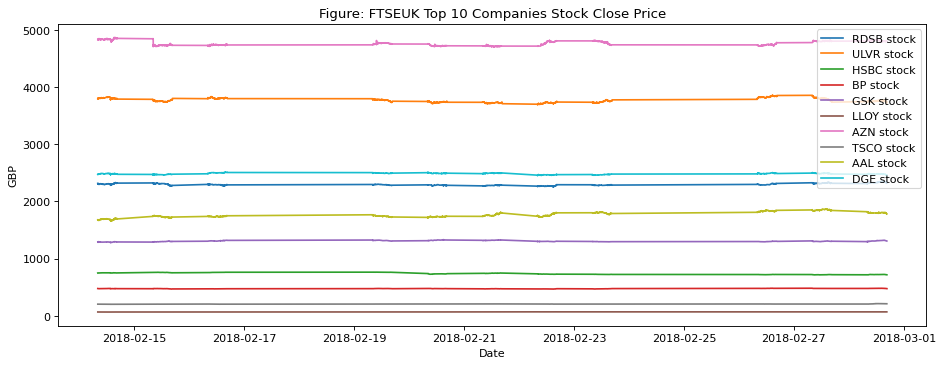

In [ ]:
plt.figure(figsize=(14, 5), dpi=80)
plt.plot(dataset_ex_df_RDSB['Dates'], dataset_ex_df_RDSB['Close'], label='RDSB stock')
plt.plot(dataset_ex_df_ULVR['Dates'], dataset_ex_df_ULVR['Close'], label='ULVR stock')
plt.plot(dataset_ex_df_HSBC['Dates'], dataset_ex_df_HSBC['Close'], label='HSBC stock')
plt.plot(dataset_ex_df_BP['Dates'], dataset_ex_df_BP['Close'], label='BP stock')
plt.plot(dataset_ex_df_GSK['Dates'], dataset_ex_df_GSK['Close'], label='GSK stock')
plt.plot(dataset_ex_df_LLOY['Dates'], dataset_ex_df_LLOY['Close'], label='LLOY stock')
plt.plot(dataset_ex_df_AZN['Dates'], dataset_ex_df_AZN['Close'], label='AZN stock')
plt.plot(dataset_ex_df_TSCO['Dates'], dataset_ex_df_TSCO['Close'], label='TSCO stock')
plt.plot(dataset_ex_df_AAL['Dates'], dataset_ex_df_AAL['Close'], label='AAL stock')
plt.plot(dataset_ex_df_DGE['Dates'], dataset_ex_df_DGE['Close'], label='DGE stock')
plt.xlabel('Date')
plt.ylabel('GBP')
plt.title('Figure: FTSEUK Top 10 Companies Stock Close Price')
plt.legend()
plt.show()

#Feature Generation

**1. Technical Indicators**

In [ ]:
def get_technical_indicators(dataset): #function to generate feature technical indicators
    
    
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window = 7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window = 21).mean()
    
    #Create MACD
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    
    #Create Bollinger Bands
    dataset['20sd'] = dataset['Close'].rolling(window = 20).std()
    dataset['upper_band'] = (dataset['Close'].rolling(window = 20).mean()) + (dataset['20sd']*2)
    dataset['lower_band'] = (dataset['Close'].rolling(window = 20).mean()) - (dataset['20sd']*2)
    
    
    #Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    #Create Momentum
    dataset['momentum'] = (dataset['Close']/100)-1
    
    
    
    return dataset

In [ ]:
dataset_TI_df_RDSB = get_technical_indicators(dataset_ex_df_RDSB)
print(dataset_TI_df_RDSB.head())
dataset_TI_df_ULVR = get_technical_indicators(dataset_ex_df_ULVR)
print(dataset_TI_df_ULVR.head())
dataset_TI_df_HSBC = get_technical_indicators(dataset_ex_df_HSBC)
print(dataset_TI_df_HSBC.head())
dataset_TI_df_BP = get_technical_indicators(dataset_ex_df_BP)
print(dataset_TI_df_BP.head())
dataset_TI_df_GSK = get_technical_indicators(dataset_ex_df_GSK)
print(dataset_TI_df_GSK.head())
dataset_TI_df_LLOY = get_technical_indicators(dataset_ex_df_LLOY)
print(dataset_TI_df_LLOY.head())
dataset_TI_df_AZN = get_technical_indicators(dataset_ex_df_AZN)
print(dataset_TI_df_AZN.head())
dataset_TI_df_TSCO = get_technical_indicators(dataset_ex_df_TSCO)
print(dataset_TI_df_TSCO.head())
dataset_TI_df_AAL = get_technical_indicators(dataset_ex_df_AAL)
print(dataset_TI_df_AAL.head())
dataset_TI_df_DGE = get_technical_indicators(dataset_ex_df_DGE)
print(dataset_TI_df_DGE.head())

                Dates    Open   Close  ...  lower_band          ema  momentum
0 2018-02-14 08:00:00  2319.0  2315.5  ...         NaN  2315.500000    22.155
1 2018-02-14 08:01:00  2316.5  2314.0  ...         NaN  2314.375000    22.140
2 2018-02-14 08:02:00  2311.5  2306.0  ...         NaN  2308.576923    22.060
3 2018-02-14 08:03:00  2306.5  2306.5  ...         NaN  2307.175000    22.065
4 2018-02-14 08:04:00  2309.0  2309.0  ...         NaN  2308.396694    22.090

[5 rows x 17 columns]
                Dates    Open   Close  ...  lower_band          ema  momentum
0 2018-02-14 08:00:00  3805.0  3797.5  ...         NaN  3797.500000    36.975
1 2018-02-14 08:01:00  3801.0  3800.0  ...         NaN  3799.375000    37.000
2 2018-02-14 08:02:00  3797.0  3793.0  ...         NaN  3794.961538    36.930
3 2018-02-14 08:03:00  3796.0  3802.5  ...         NaN  3800.050000    37.025
4 2018-02-14 08:04:00  3801.0  3799.5  ...         NaN  3799.681818    36.995

[5 rows x 17 columns]
                Da

**2. Time Series Analysis using Fourier Transform**

In [ ]:
data_FT_RDSB = dataset_ex_df_RDSB[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT_RDSB['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

In [ ]:
def get_fourier(dataset):
    data_FT_RDSB = dataset[['Dates', 'Close']]
    close_fft = np.fft.fft(np.asarray(data_FT_RDSB['Close'].tolist()))
    close_fft = np.fft.ifft(close_fft)
    close_fft
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_list_m10= np.copy(fft_list); fft_list_m10[100:-100]=0
    dataset['Fourier'] = pd.DataFrame(fft_list_m10).apply(lambda x: np.abs(x))
    #dataset['absolute'] = dataset['Fourier'].apply(lambda x: np.abs(x))
    return dataset

In [ ]:
dataset_TI_df_RDSB = get_fourier(dataset_ex_df_RDSB)
dataset_TI_df_RDSB.head(3)

Dates    Open   Close  ...          ema  momentum  Fourier
0 2018-02-14 08:00:00  2319.0  2315.5  ...  2315.500000    22.155   2315.5
1 2018-02-14 08:01:00  2316.5  2314.0  ...  2314.375000    22.140   2314.0
2 2018-02-14 08:02:00  2311.5  2306.0  ...  2308.576923    22.060   2306.0

[3 rows x 18 columns]

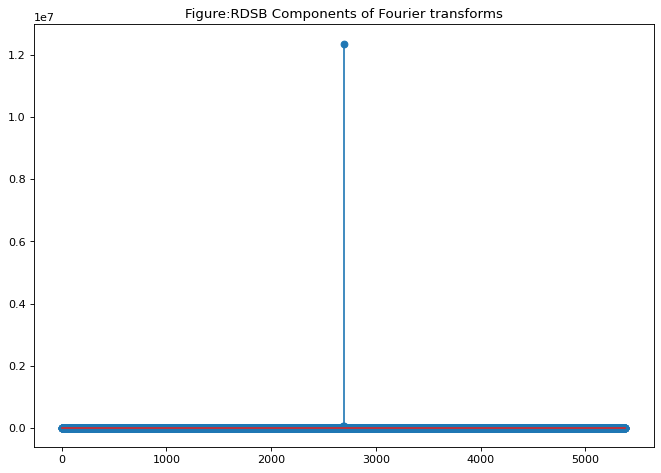

In [ ]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure:RDSB Components of Fourier transforms')
plt.show()

In [ ]:
data_FT_ULVR = dataset_ex_df_ULVR[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT_ULVR['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

In [ ]:
def get_fourier(dataset):
    data_FT_ULVR = dataset[['Dates', 'Close']]
    close_fft = np.fft.fft(np.asarray(data_FT_ULVR['Close'].tolist()))
    close_fft = np.fft.ifft(close_fft)
    close_fft
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_list_m10= np.copy(fft_list); fft_list_m10[100:-100]=0
    dataset['Fourier'] = pd.DataFrame(fft_list_m10).apply(lambda x: np.abs(x))
    #dataset['absolute'] = dataset['Fourier'].apply(lambda x: np.abs(x))
    return dataset

In [ ]:
dataset_TI_df_ULVR = get_fourier(dataset_ex_df_ULVR)
dataset_TI_df_ULVR.head(3)

Dates    Open   Close  ...          ema  momentum  Fourier
0 2018-02-14 08:00:00  3805.0  3797.5  ...  3797.500000    36.975   3797.5
1 2018-02-14 08:01:00  3801.0  3800.0  ...  3799.375000    37.000   3800.0
2 2018-02-14 08:02:00  3797.0  3793.0  ...  3794.961538    36.930   3793.0

[3 rows x 18 columns]

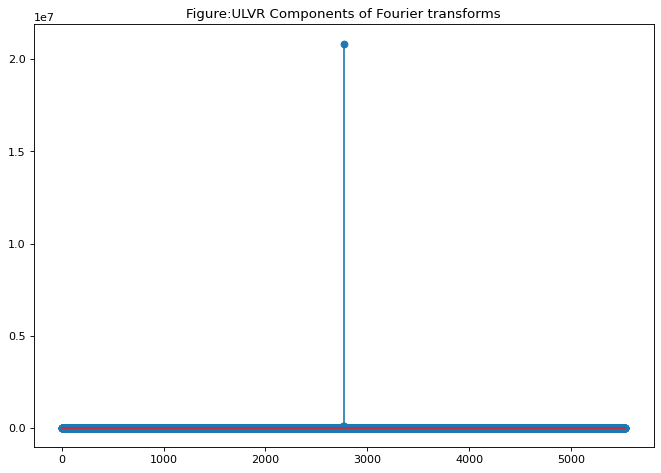

In [ ]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure:ULVR Components of Fourier transforms')
plt.show()

In [ ]:
data_FT_HSBC = dataset_ex_df_HSBC[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT_HSBC['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

In [ ]:
def get_fourier(dataset):
    data_FT_HSBC = dataset[['Dates', 'Close']]
    close_fft = np.fft.fft(np.asarray(data_FT_HSBC['Close'].tolist()))
    close_fft = np.fft.ifft(close_fft)
    close_fft
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_list_m10= np.copy(fft_list); fft_list_m10[100:-100]=0
    dataset['Fourier'] = pd.DataFrame(fft_list_m10).apply(lambda x: np.abs(x))
    #dataset['absolute'] = dataset['Fourier'].apply(lambda x: np.abs(x))
    return dataset

In [ ]:
dataset_TI_df_HSBC = get_fourier(dataset_ex_df_HSBC)
dataset_TI_df_HSBC.head(3)

Dates   Open  Close  ...         ema  momentum  Fourier
0 2018-02-14 08:00:00  751.0  749.2  ...  749.200000     6.492    749.2
1 2018-02-14 08:01:00  749.2  749.9  ...  749.725000     6.499    749.9
2 2018-02-14 08:02:00  749.7  749.8  ...  749.776923     6.498    749.8

[3 rows x 18 columns]

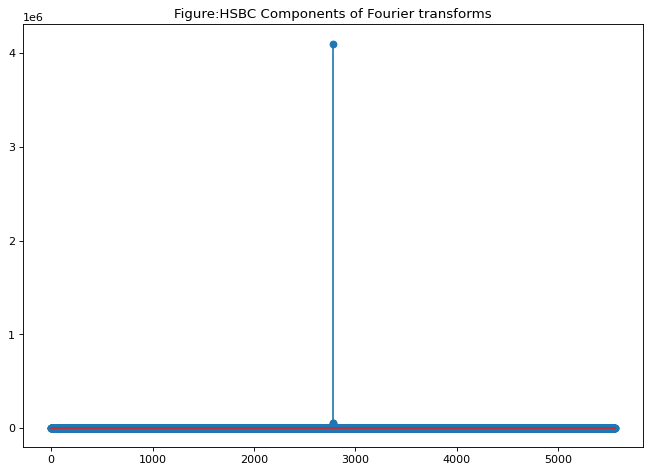

In [ ]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure:HSBC Components of Fourier transforms')
plt.show()

In [ ]:
data_FT_BP = dataset_ex_df_BP[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT_BP['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

In [ ]:
def get_fourier(dataset):
    data_FT_BP = dataset[['Dates', 'Close']]
    close_fft = np.fft.fft(np.asarray(data_FT_BP['Close'].tolist()))
    close_fft = np.fft.ifft(close_fft)
    close_fft
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_list_m10= np.copy(fft_list); fft_list_m10[100:-100]=0
    dataset['Fourier'] = pd.DataFrame(fft_list_m10).apply(lambda x: np.abs(x))
    #dataset['absolute'] = dataset['Fourier'].apply(lambda x: np.abs(x))
    return dataset

In [ ]:
dataset_TI_df_BP = get_fourier(dataset_ex_df_BP)
dataset_TI_df_BP.head(3)

Dates    Open   Close  ...         ema  momentum  Fourier
0 2018-02-14 08:00:00  477.00  476.70  ...  476.700000    3.7670   476.70
1 2018-02-14 08:01:00  477.05  476.25  ...  476.362500    3.7625   476.25
2 2018-02-14 08:02:00  476.05  475.00  ...  475.419231    3.7500   475.00

[3 rows x 18 columns]

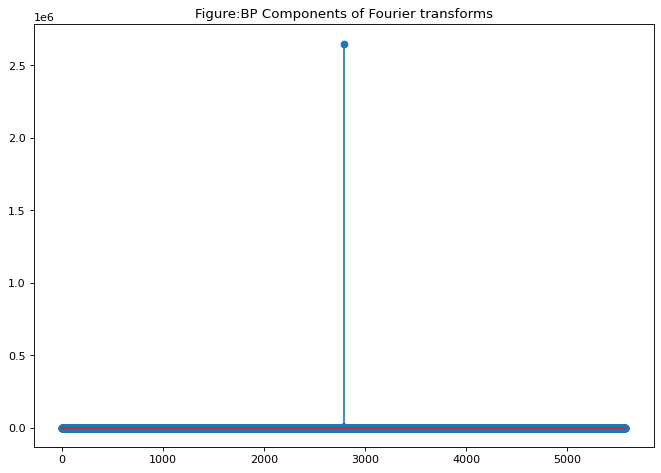

In [ ]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure:BP Components of Fourier transforms')
plt.show()

In [ ]:
data_FT_GSK = dataset_ex_df_GSK[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT_GSK['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

In [ ]:
def get_fourier(dataset):
    data_FT_GSK = dataset[['Dates', 'Close']]
    close_fft = np.fft.fft(np.asarray(data_FT_GSK['Close'].tolist()))
    close_fft = np.fft.ifft(close_fft)
    close_fft
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_list_m10= np.copy(fft_list); fft_list_m10[100:-100]=0
    dataset['Fourier'] = pd.DataFrame(fft_list_m10).apply(lambda x: np.abs(x))
    #dataset['absolute'] = dataset['Fourier'].apply(lambda x: np.abs(x))
    return dataset

In [ ]:
dataset_TI_df_GSK = get_fourier(dataset_ex_df_GSK)
dataset_TI_df_GSK.head(3)

Dates    Open   Close  ...          ema  momentum  Fourier
0 2018-02-14 08:01:00  1293.4  1292.8  ...  1292.800000    11.928   1292.8
1 2018-02-14 08:00:00  1292.8  1288.8  ...  1289.800000    11.888   1288.8
2 2018-02-14 08:02:00  1288.2  1286.4  ...  1287.446154    11.864   1286.4

[3 rows x 18 columns]

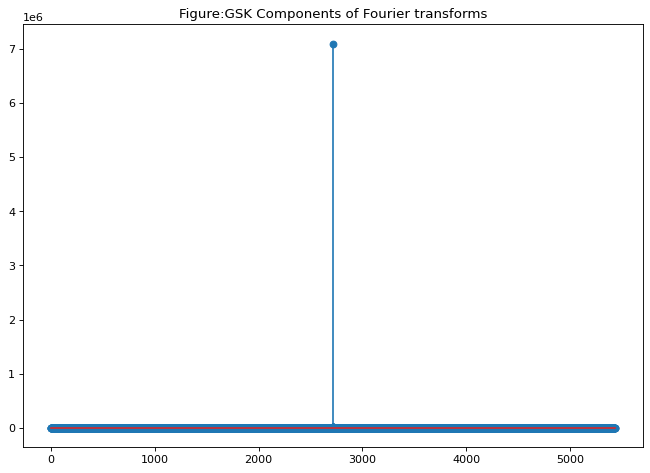

In [ ]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure:GSK Components of Fourier transforms')
plt.show()

In [ ]:
data_FT_LLOY = dataset_ex_df_LLOY[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT_LLOY['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

In [ ]:
def get_fourier(dataset):
    data_FT_LLOY = dataset[['Dates', 'Close']]
    close_fft = np.fft.fft(np.asarray(data_FT_LLOY['Close'].tolist()))
    close_fft = np.fft.ifft(close_fft)
    close_fft
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_list_m10= np.copy(fft_list); fft_list_m10[100:-100]=0
    dataset['Fourier'] = pd.DataFrame(fft_list_m10).apply(lambda x: np.abs(x))
    #dataset['absolute'] = dataset['Fourier'].apply(lambda x: np.abs(x))
    return dataset

In [ ]:
dataset_TI_df_LLOY = get_fourier(dataset_ex_df_LLOY)
dataset_TI_df_LLOY.head(3)

Dates   Open  Close  ...        ema  momentum  Fourier
0 2018-02-14 08:00:00  67.00  67.07  ...  67.070000   -0.3293    67.07
1 2018-02-14 08:01:00  67.17  67.16  ...  67.137500   -0.3284    67.16
2 2018-02-14 08:02:00  67.10  66.98  ...  67.028462   -0.3302    66.98

[3 rows x 18 columns]

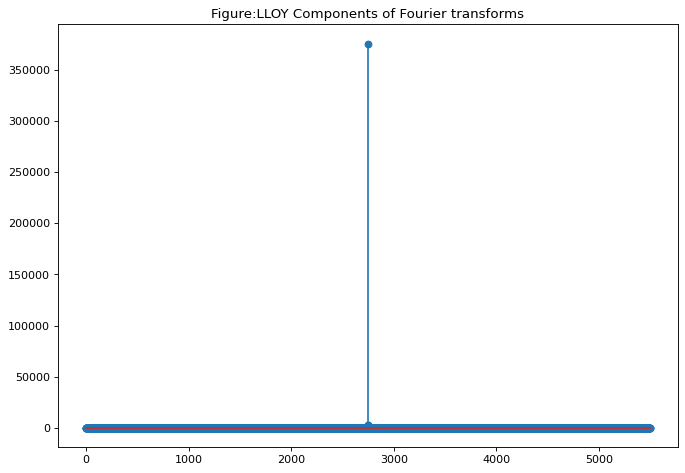

In [ ]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure:LLOY Components of Fourier transforms')
plt.show()

In [ ]:
data_FT_AZN = dataset_ex_df_AZN[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT_AZN['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

In [ ]:
def get_fourier(dataset):
    data_FT_AZN = dataset[['Dates', 'Close']]
    close_fft = np.fft.fft(np.asarray(data_FT_AZN['Close'].tolist()))
    close_fft = np.fft.ifft(close_fft)
    close_fft
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_list_m10= np.copy(fft_list); fft_list_m10[100:-100]=0
    dataset['Fourier'] = pd.DataFrame(fft_list_m10).apply(lambda x: np.abs(x))
    #dataset['absolute'] = dataset['Fourier'].apply(lambda x: np.abs(x))
    return dataset

In [ ]:
dataset_TI_df_AZN = get_fourier(dataset_ex_df_AZN)
dataset_TI_df_AZN.head(3)

Dates    Open   Close  ...          ema  momentum  Fourier
0 2018-02-14 08:00:00  4835.5  4832.5  ...  4832.500000    47.325   4832.5
1 2018-02-14 08:01:00  4832.5  4832.5  ...  4832.500000    47.325   4832.5
2 2018-02-14 08:02:00  4834.5  4830.0  ...  4830.769231    47.300   4830.0

[3 rows x 18 columns]

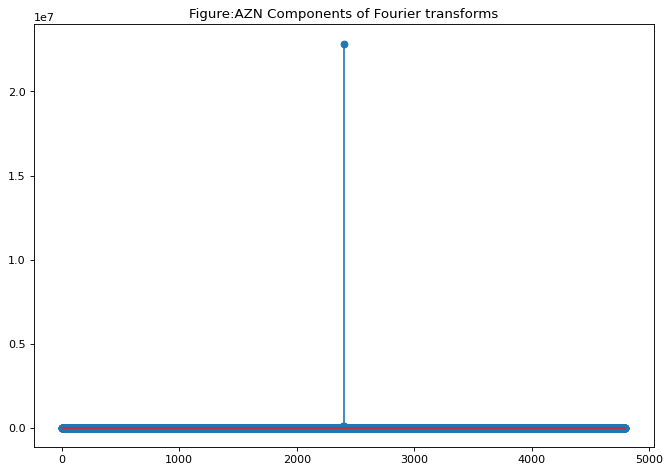

In [ ]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure:AZN Components of Fourier transforms')
plt.show()

In [ ]:
data_FT_TSCO = dataset_ex_df_TSCO[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT_TSCO['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

In [ ]:
def get_fourier(dataset):
    data_FT_TSCO = dataset[['Dates', 'Close']]
    close_fft = np.fft.fft(np.asarray(data_FT_TSCO['Close'].tolist()))
    close_fft = np.fft.ifft(close_fft)
    close_fft
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_list_m10= np.copy(fft_list); fft_list_m10[100:-100]=0
    dataset['Fourier'] = pd.DataFrame(fft_list_m10).apply(lambda x: np.abs(x))
    #dataset['absolute'] = dataset['Fourier'].apply(lambda x: np.abs(x))
    return dataset

In [ ]:
dataset_TI_df_TSCO = get_fourier(dataset_ex_df_TSCO)
dataset_TI_df_TSCO.head(3)

Dates   Open  Close  ...         ema  momentum  Fourier
0 2018-02-14 08:00:00  204.0  204.0  ...  204.000000     1.040    204.0
1 2018-02-14 08:01:00  204.1  204.1  ...  204.075000     1.041    204.1
2 2018-02-14 08:02:00  204.2  204.1  ...  204.092308     1.041    204.1

[3 rows x 18 columns]

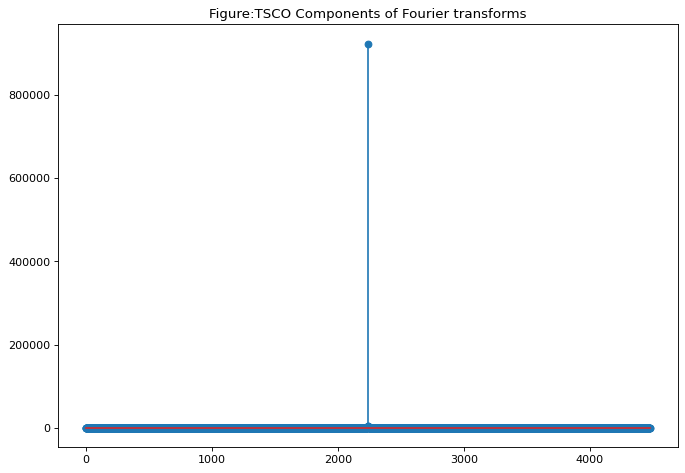

In [ ]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure:TSCO Components of Fourier transforms')
plt.show()

In [ ]:
data_FT_AAL = dataset_ex_df_AAL[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT_AAL['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

In [ ]:
def get_fourier(dataset):
    data_FT_AAL = dataset[['Dates', 'Close']]
    close_fft = np.fft.fft(np.asarray(data_FT_AAL['Close'].tolist()))
    close_fft = np.fft.ifft(close_fft)
    close_fft
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_list_m10= np.copy(fft_list); fft_list_m10[100:-100]=0
    dataset['Fourier'] = pd.DataFrame(fft_list_m10).apply(lambda x: np.abs(x))
    #dataset['absolute'] = dataset['Fourier'].apply(lambda x: np.abs(x))
    return dataset

In [ ]:
dataset_TI_df_AAL = get_fourier(dataset_ex_df_AAL)
dataset_TI_df_AAL.head(3)

Dates    Open   Close  ...          ema  momentum  Fourier
0 2018-02-14 08:00:00  1682.0  1679.8  ...  1679.800000    15.798   1679.8
1 2018-02-14 08:01:00  1679.8  1680.8  ...  1680.550000    15.808   1680.8
2 2018-02-14 08:02:00  1681.2  1679.0  ...  1679.476923    15.790   1679.0

[3 rows x 18 columns]

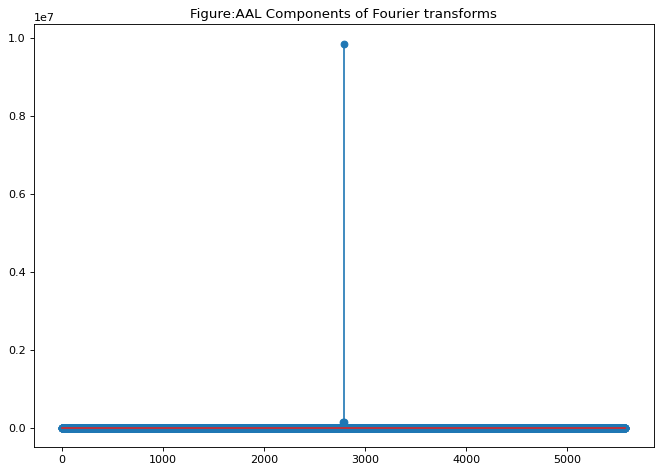

In [ ]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure:AAL Components of Fourier transforms')
plt.show()

In [ ]:
data_FT_DGE = dataset_ex_df_DGE[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT_DGE['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

In [ ]:
def get_fourier(dataset):
    data_FT_DGE = dataset[['Dates', 'Close']]
    close_fft = np.fft.fft(np.asarray(data_FT_DGE['Close'].tolist()))
    close_fft = np.fft.ifft(close_fft)
    close_fft
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_list_m10= np.copy(fft_list); fft_list_m10[100:-100]=0
    dataset['Fourier'] = pd.DataFrame(fft_list_m10).apply(lambda x: np.abs(x))
    #dataset['absolute'] = dataset['Fourier'].apply(lambda x: np.abs(x))
    return dataset

In [ ]:
dataset_TI_df_DGE = get_fourier(dataset_ex_df_DGE)
dataset_TI_df_DGE.head(3)

Dates    Open   Close  ...          ema  momentum  Fourier
0 2018-02-14 08:00:00  2473.0  2473.0  ...  2473.000000    23.730   2473.0
1 2018-02-14 08:01:00  2474.0  2474.5  ...  2474.125000    23.745   2474.5
2 2018-02-14 08:02:00  2476.0  2475.0  ...  2474.730769    23.750   2475.0

[3 rows x 18 columns]

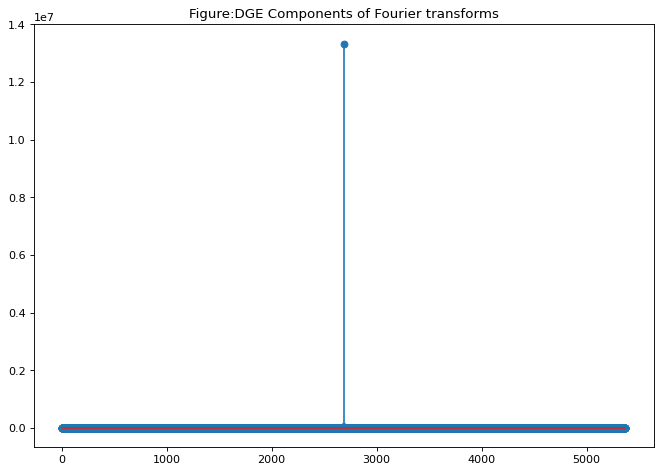

In [ ]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure:DGE Components of Fourier transforms')
plt.show()

**4. ARIMA model as a feature**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series_RDSB = data_FT_RDSB['Close']
model = ARIMA(series_RDSB, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5381
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8390.099
Method:                       css-mle   S.D. of innovations              1.151
Date:                Mon, 10 Aug 2020   AIC                          16794.199
Time:                        11:11:46   BIC                          16840.333
Sample:                             1   HQIC                         16810.308
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0012      0.015      0.082      0.935      -0.028       0.030
ar.L1.D.Close    -0.0059      0.014     -0.429      0.668      -0.033       0.021
ar.L2.D.Close    -0.0289      0.014     

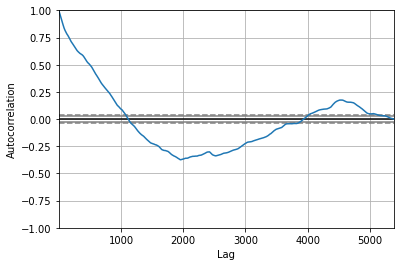

<Figure size 800x560 with 0 Axes>

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_RDSB)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [ ]:
from pandas import datetime
from pandas import DataFrame


X = series_RDSB.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

dataset_TI_df_RDSB['ARIMA'] = pd.DataFrame(predictions)

In [ ]:
from math import sqrt
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
accuracy = r2_score(test, predictions)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test RMSE: %.3f' % rmse)
print('Test accuracy: %.3f' % accuracy)

Test MSE: 0.969
Test MAE: 0.658
Test RMSE: 0.984
Test accuracy: 0.998


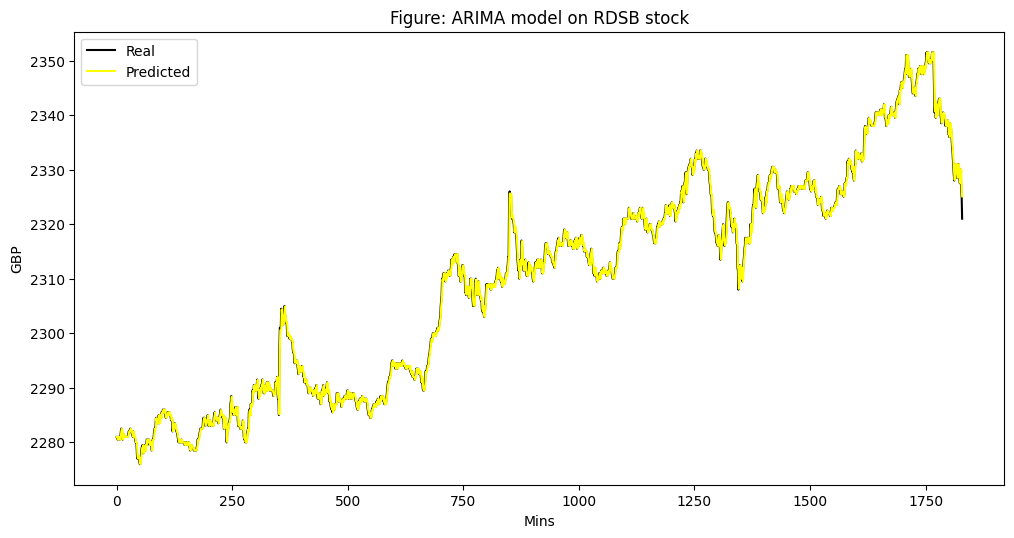

In [ ]:
# Plot the predicted (from ARIMA) and real prices
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, color='black', label='Real')
plt.plot(predictions, color='yellow', label='Predicted')
plt.xlabel('Mins')
plt.ylabel('GBP')
plt.title('Figure: ARIMA model on RDSB stock')
plt.legend()
plt.show()

In [ ]:
dataset_ex_df_RDSB.head(3)

Dates    Open   Close  ...  momentum  Fourier        ARIMA
0 2018-02-14 08:00:00  2319.0  2315.5  ...    22.155   2315.5  2280.999660
1 2018-02-14 08:01:00  2316.5  2314.0  ...    22.140   2314.0  2280.965854
2 2018-02-14 08:02:00  2311.5  2306.0  ...    22.060   2306.0  2280.974714

[3 rows x 19 columns]

In [ ]:
dataset_ex_df_RDSB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5382 entries, 0 to 5381
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       5382 non-null   datetime64[ns]
 1   Open        5382 non-null   float64       
 2   Close       5382 non-null   float64       
 3   High        5382 non-null   float64       
 4   Low         5382 non-null   float64       
 5   Value       5382 non-null   float64       
 6   Volume      5382 non-null   int64         
 7   ma7         5376 non-null   float64       
 8   ma21        5362 non-null   float64       
 9   26ema       5382 non-null   float64       
 10  12ema       5382 non-null   float64       
 11  MACD        5382 non-null   float64       
 12  20sd        5363 non-null   float64       
 13  upper_band  5363 non-null   float64       
 14  lower_band  5363 non-null   float64       
 15  ema         5382 non-null   float64       
 16  momentum    5382 non-nul

In [ ]:
print('Total RDSB dataset has {} samples, and {} features.'.format(dataset_ex_df_RDSB.shape[0], \
                                                              dataset_ex_df_RDSB.shape[1]))

Total RDSB dataset has 5382 samples, and 19 features.


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series_ULVR = data_FT_ULVR['Close']
model = ARIMA(series_ULVR, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5533
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11301.204
Method:                       css-mle   S.D. of innovations              1.866
Date:                Mon, 10 Aug 2020   AIC                          22616.407
Time:                        11:21:04   BIC                          22662.737
Sample:                             1   HQIC                         22632.562
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0134      0.025     -0.540      0.589      -0.062       0.035
ar.L1.D.Close    -0.0582      0.013     -4.316      0.000      -0.085      -0.032
ar.L2.D.Close     0.0546      0.014     

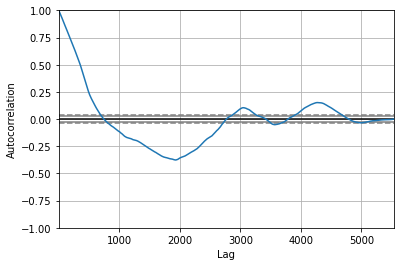

<Figure size 800x560 with 0 Axes>

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_ULVR)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [ ]:
from pandas import datetime
from pandas import DataFrame


X = series_ULVR.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

dataset_TI_df_ULVR['ARIMA'] = pd.DataFrame(predictions)

In [ ]:
from math import sqrt
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
accuracy = r2_score(test, predictions)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test RMSE: %.3f' % rmse)
print('Test accuracy: %.3f' % accuracy)

Test MSE: 3.251
Test MAE: 1.240
Test RMSE: 1.803
Test accuracy: 0.997


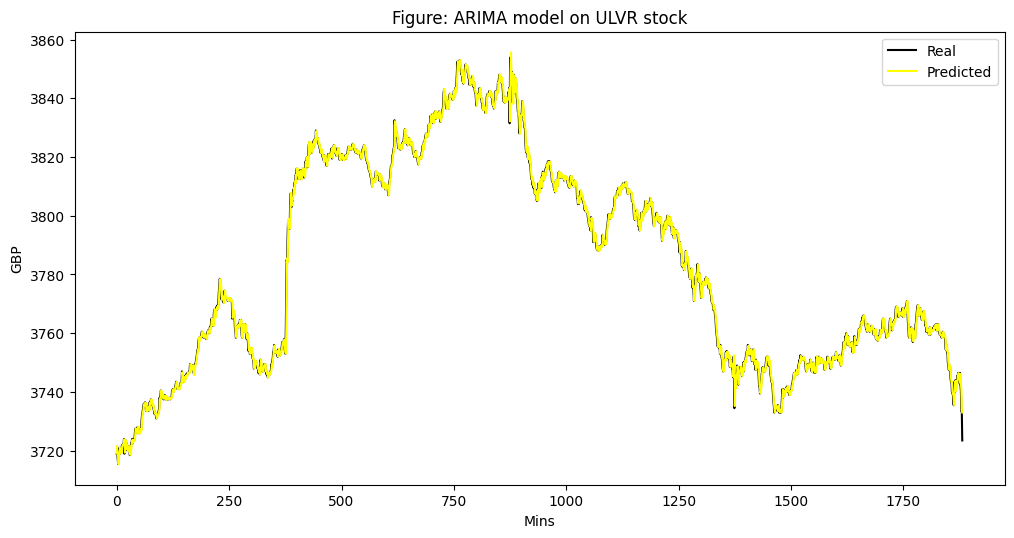

In [ ]:
# Plot the predicted (from ARIMA) and real prices
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, color='black', label='Real')
plt.plot(predictions, color='yellow', label='Predicted')
plt.xlabel('Mins')
plt.ylabel('GBP')
plt.title('Figure: ARIMA model on ULVR stock')
plt.legend()
plt.show()

In [ ]:
print(dataset_ex_df_ULVR.head(3))
print(dataset_ex_df_ULVR.info())
print('\n Total ULVR dataset has {} samples, and {} features.'.format(dataset_ex_df_ULVR.shape[0], \
                                                              dataset_ex_df_ULVR.shape[1]))

                Dates    Open   Close  ...  momentum  Fourier        ARIMA
0 2018-02-14 08:00:00  3805.0  3797.5  ...    36.975   3797.5  3721.546548
1 2018-02-14 08:01:00  3801.0  3800.0  ...    37.000   3800.0  3718.949469
2 2018-02-14 08:02:00  3797.0  3793.0  ...    36.930   3793.0  3719.381485

[3 rows x 19 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5534 entries, 0 to 5533
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       5534 non-null   datetime64[ns]
 1   Open        5534 non-null   float64       
 2   Close       5534 non-null   float64       
 3   High        5534 non-null   float64       
 4   Low         5534 non-null   float64       
 5   Value       5534 non-null   float64       
 6   Volume      5534 non-null   int64         
 7   ma7         5528 non-null   float64       
 8   ma21        5514 non-null   float64       
 9   26ema       5534 non-null   float64  

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series_HSBC = data_FT_HSBC['Close']
model = ARIMA(series_HSBC, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5556
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3453.367
Method:                       css-mle   S.D. of innovations              0.451
Date:                Mon, 10 Aug 2020   AIC                           6920.734
Time:                        11:30:10   BIC                           6967.093
Sample:                             1   HQIC                          6936.896
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0058      0.006     -0.931      0.352      -0.018       0.006
ar.L1.D.Close     0.0322      0.013      2.401      0.016       0.006       0.059
ar.L2.D.Close    -0.0125      0.013     

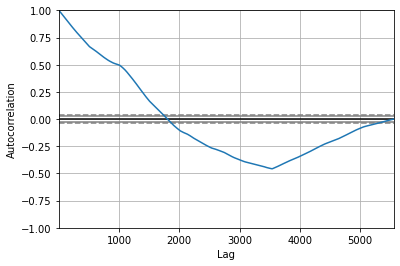

<Figure size 800x560 with 0 Axes>

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_HSBC)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [ ]:
from pandas import datetime
from pandas import DataFrame


X = series_HSBC.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

dataset_TI_df_HSBC['ARIMA'] = pd.DataFrame(predictions)

In [ ]:
from math import sqrt
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
accuracy = r2_score(test, predictions)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test RMSE: %.3f' % rmse)
print('Test accuracy: %.3f' % accuracy)

Test MSE: 0.069
Test MAE: 0.176
Test RMSE: 0.262
Test accuracy: 0.991


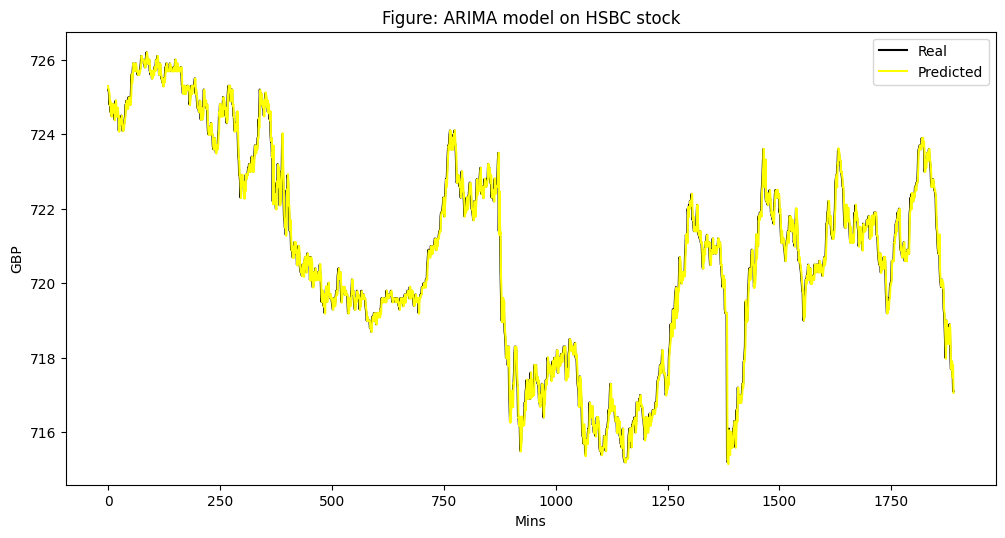

In [ ]:
# Plot the predicted (from ARIMA) and real prices
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, color='black', label='Real')
plt.plot(predictions, color='yellow', label='Predicted')
plt.xlabel('Mins')
plt.ylabel('GBP')
plt.title('Figure: ARIMA model on HSBC stock')
plt.legend()
plt.show()

In [ ]:
print(dataset_ex_df_HSBC.head(3))
print(dataset_ex_df_HSBC.info())
print('\n Total HSBC dataset has {} samples, and {} features.'.format(dataset_ex_df_HSBC.shape[0], \
                                                              dataset_ex_df_HSBC.shape[1]))

                Dates   Open  Close  ...  momentum  Fourier       ARIMA
0 2018-02-14 08:00:00  751.0  749.2  ...     6.492    749.2  725.294564
1 2018-02-14 08:01:00  749.2  749.9  ...     6.499    749.9  725.190551
2 2018-02-14 08:02:00  749.7  749.8  ...     6.498    749.8  725.188952

[3 rows x 19 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5557 entries, 0 to 5556
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       5557 non-null   datetime64[ns]
 1   Open        5557 non-null   float64       
 2   Close       5557 non-null   float64       
 3   High        5557 non-null   float64       
 4   Low         5557 non-null   float64       
 5   Value       5557 non-null   float64       
 6   Volume      5557 non-null   int64         
 7   ma7         5551 non-null   float64       
 8   ma21        5537 non-null   float64       
 9   26ema       5557 non-null   float64       
 10  1

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series_BP = data_FT_BP['Close']
model = ARIMA(series_BP, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5574
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -148.990
Method:                       css-mle   S.D. of innovations              0.249
Date:                Mon, 10 Aug 2020   AIC                            311.980
Time:                        11:46:08   BIC                            358.361
Sample:                             1   HQIC                           328.146
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.003     -0.083      0.934      -0.007       0.006
ar.L1.D.Close     0.0038      0.013      0.284      0.777      -0.022       0.030
ar.L2.D.Close    -0.0177      0.013     

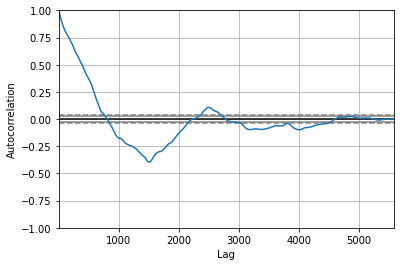

<Figure size 800x560 with 0 Axes>

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_BP)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [ ]:
from pandas import datetime
from pandas import DataFrame


X = series_BP.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

dataset_TI_df_BP['ARIMA'] = pd.DataFrame(predictions)

In [ ]:
from math import sqrt
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
accuracy = r2_score(test, predictions)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test RMSE: %.3f' % rmse)
print('Test accuracy: %.3f' % accuracy)

Test MSE: 0.052
Test MAE: 0.141
Test RMSE: 0.229
Test accuracy: 0.995


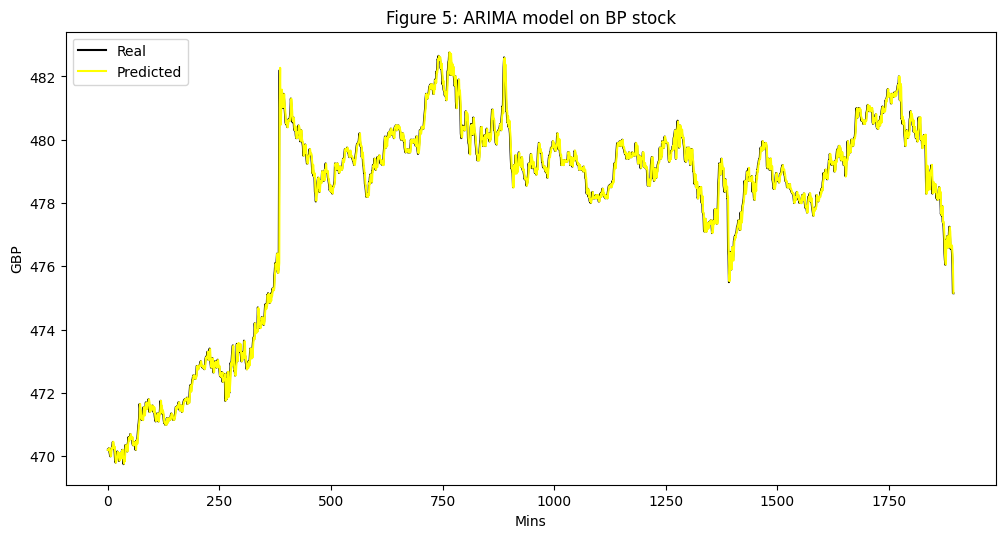

In [ ]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, color='black', label='Real')
plt.plot(predictions, color='yellow', label='Predicted')
plt.xlabel('Mins')
plt.ylabel('GBP')
plt.title('Figure 5: ARIMA model on BP stock')
plt.legend()
plt.show()

In [ ]:
print(dataset_ex_df_BP.head(3))
print(dataset_ex_df_BP.info())
print('\n Total BP dataset has {} samples, and {} features.'.format(dataset_ex_df_BP.shape[0], \
                                                              dataset_ex_df_BP.shape[1]))

                Dates    Open   Close  ...  momentum  Fourier       ARIMA
0 2018-02-14 08:00:00  477.00  476.70  ...    3.7670   476.70  470.195786
1 2018-02-14 08:01:00  477.05  476.25  ...    3.7625   476.25  470.191943
2 2018-02-14 08:02:00  476.05  475.00  ...    3.7500   475.00  470.210510

[3 rows x 19 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       5575 non-null   datetime64[ns]
 1   Open        5575 non-null   float64       
 2   Close       5575 non-null   float64       
 3   High        5575 non-null   float64       
 4   Low         5575 non-null   float64       
 5   Value       5575 non-null   float64       
 6   Volume      5575 non-null   int64         
 7   ma7         5569 non-null   float64       
 8   ma21        5555 non-null   float64       
 9   26ema       5575 non-null   float64      

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series_GSK = data_FT_GSK['Close']
model = ARIMA(series_GSK, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5431
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5367.081
Method:                       css-mle   S.D. of innovations              0.650
Date:                Mon, 10 Aug 2020   AIC                          10748.162
Time:                        14:14:12   BIC                          10794.361
Sample:                             1   HQIC                         10764.287
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0027      0.008      0.331      0.741      -0.013       0.019
ar.L1.D.Close    -0.0332      0.014     -2.438      0.015      -0.060      -0.007
ar.L2.D.Close     0.0638      0.014     

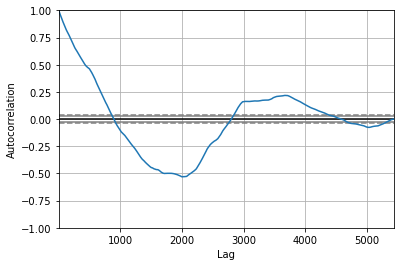

<Figure size 800x560 with 0 Axes>

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_GSK)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [ ]:
from pandas import datetime
from pandas import DataFrame

X = series_GSK.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

dataset_TI_df_GSK['ARIMA'] = pd.DataFrame(predictions)

In [ ]:
from math import sqrt
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
accuracy = r2_score(test, predictions)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test RMSE: %.3f' % rmse)
print('Test accuracy: %.3f' % accuracy)

Test MSE: 0.283
Test MAE: 0.332
Test RMSE: 0.532
Test accuracy: 0.994


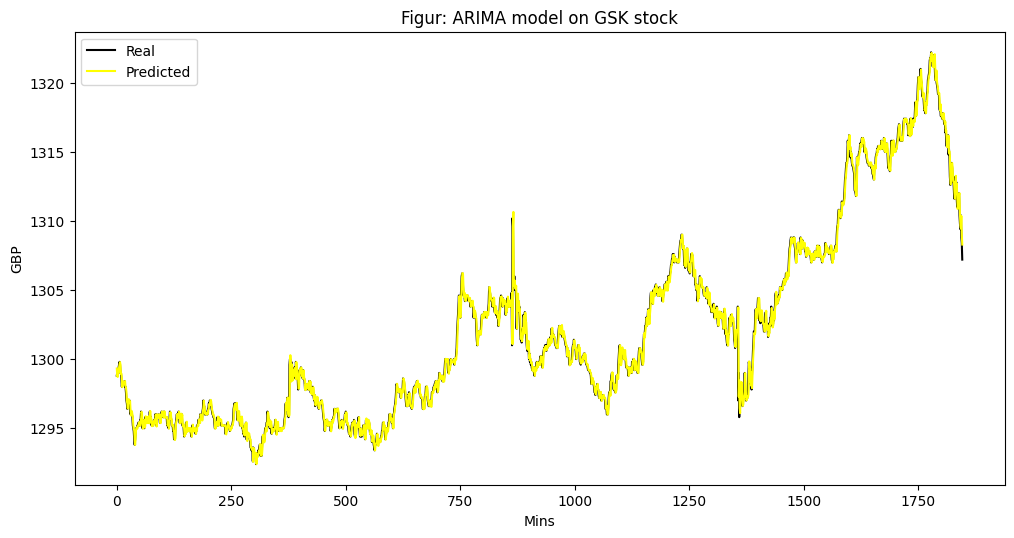

In [ ]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, color='black', label='Real')
plt.plot(predictions, color='yellow', label='Predicted')
plt.xlabel('Mins')
plt.ylabel('GBP')
plt.title('Figur: ARIMA model on GSK stock')
plt.legend()
plt.show()

In [ ]:
print(dataset_ex_df_GSK.head(3))
print(dataset_ex_df_GSK.info())
print('\n Total GSK dataset has {} samples, and {} features.'.format(dataset_ex_df_GSK.shape[0], \
                                                              dataset_ex_df_GSK.shape[1]))

                Dates    Open   Close  ...  momentum  Fourier        ARIMA
0 2018-02-14 08:01:00  1293.4  1292.8  ...    11.928   1292.8  1299.319966
1 2018-02-14 08:00:00  1292.8  1288.8  ...    11.888   1288.8  1298.790351
2 2018-02-14 08:02:00  1288.2  1286.4  ...    11.864   1286.4  1298.706242

[3 rows x 19 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       5432 non-null   datetime64[ns]
 1   Open        5432 non-null   float64       
 2   Close       5432 non-null   float64       
 3   High        5432 non-null   float64       
 4   Low         5432 non-null   float64       
 5   Value       5432 non-null   float64       
 6   Volume      5432 non-null   int64         
 7   ma7         5426 non-null   float64       
 8   ma21        5412 non-null   float64       
 9   26ema       5432 non-null   float64  

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series_LLOY = data_FT_LLOY['Close']
model = ARIMA(series_LLOY, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5494
Model:                 ARIMA(5, 1, 0)   Log Likelihood               10212.528
Method:                       css-mle   S.D. of innovations              0.038
Date:                Mon, 10 Aug 2020   AIC                         -20411.055
Time:                        12:12:14   BIC                         -20364.775
Sample:                             1   HQIC                        -20394.912
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      0.684      0.494      -0.001       0.001
ar.L1.D.Close    -0.0757      0.013     -5.607      0.000      -0.102      -0.049
ar.L2.D.Close    -0.0133      0.014     

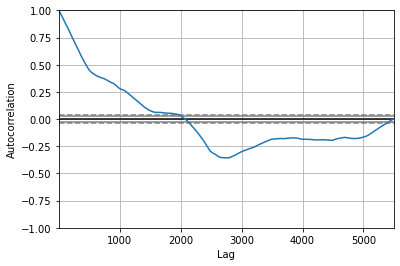

<Figure size 800x560 with 0 Axes>

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_LLOY)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [ ]:
from pandas import datetime
from pandas import DataFrame


X = series_LLOY.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

dataset_TI_df_LLOY['ARIMA'] = pd.DataFrame(predictions)

In [ ]:
from math import sqrt
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
accuracy = r2_score(test, predictions)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test RMSE: %.3f' % rmse)
print('Test accuracy: %.3f' % accuracy)

Test MSE: 0.001
Test MAE: 0.018
Test RMSE: 0.028
Test accuracy: 0.985


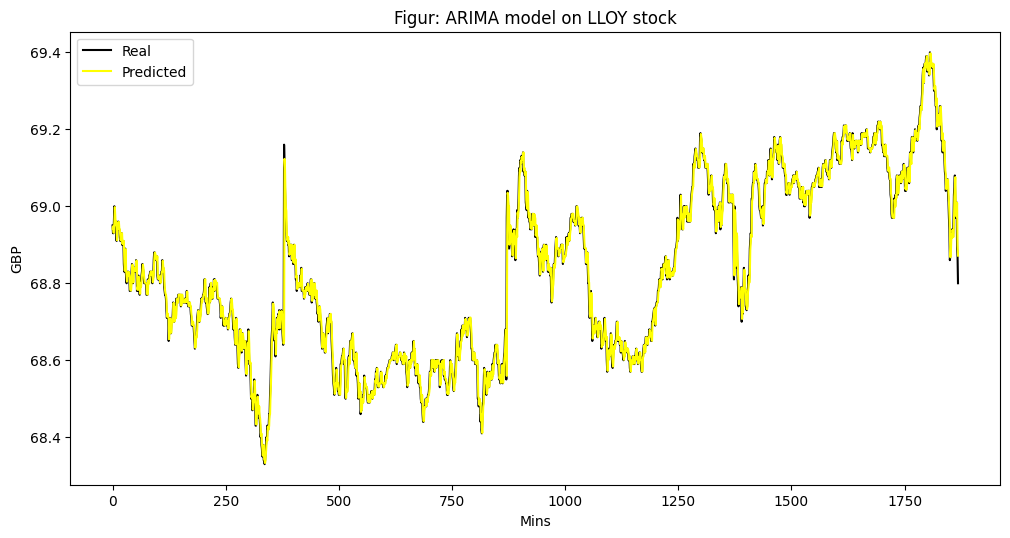

In [ ]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, color='black', label='Real')
plt.plot(predictions, color='yellow', label='Predicted')
plt.xlabel('Mins')
plt.ylabel('GBP')
plt.title('Figur: ARIMA model on LLOY stock')
plt.legend()
plt.show()

In [ ]:
print(dataset_ex_df_LLOY.head(3))
print(dataset_ex_df_LLOY.info())
print('\n Total LLOY dataset has {} samples, and {} features.'.format(dataset_ex_df_LLOY.shape[0], \
                                                              dataset_ex_df_LLOY.shape[1]))

                Dates   Open  Close  ...  momentum  Fourier      ARIMA
0 2018-02-14 08:00:00  67.00  67.07  ...   -0.3293    67.07  68.941338
1 2018-02-14 08:01:00  67.17  67.16  ...   -0.3284    67.16  68.947954
2 2018-02-14 08:02:00  67.10  66.98  ...   -0.3302    66.98  68.932713

[3 rows x 19 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495 entries, 0 to 5494
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       5495 non-null   datetime64[ns]
 1   Open        5495 non-null   float64       
 2   Close       5495 non-null   float64       
 3   High        5495 non-null   float64       
 4   Low         5495 non-null   float64       
 5   Value       5495 non-null   float64       
 6   Volume      5495 non-null   int64         
 7   ma7         5489 non-null   float64       
 8   ma21        5475 non-null   float64       
 9   26ema       5495 non-null   float64       
 10  12ema

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series_AZN = data_FT_AZN['Close']
model = ARIMA(series_AZN, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4795
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -12194.338
Method:                       css-mle   S.D. of innovations              3.078
Date:                Mon, 10 Aug 2020   AIC                          24402.675
Time:                        12:32:33   BIC                          24448.003
Sample:                             1   HQIC                         24418.595
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0067      0.037     -0.184      0.854      -0.078       0.065
ar.L1.D.Close    -0.0583      0.014     -4.043      0.000      -0.087      -0.030
ar.L2.D.Close    -0.0576      0.014     

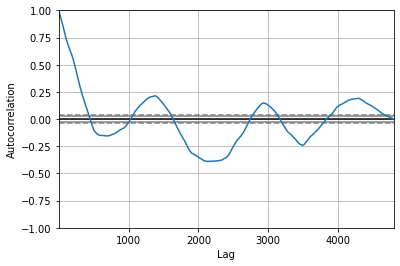

<Figure size 800x560 with 0 Axes>

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_AZN)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [ ]:
from pandas import datetime
from pandas import DataFrame


X = series_AZN.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

dataset_TI_df_AZN['ARIMA'] = pd.DataFrame(predictions)

In [ ]:
from math import sqrt
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
accuracy = r2_score(test, predictions)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test RMSE: %.3f' % rmse)
print('Test accuracy: %.3f' % accuracy)

Test MSE: 4.146
Test MAE: 1.387
Test RMSE: 2.036
Test accuracy: 0.996


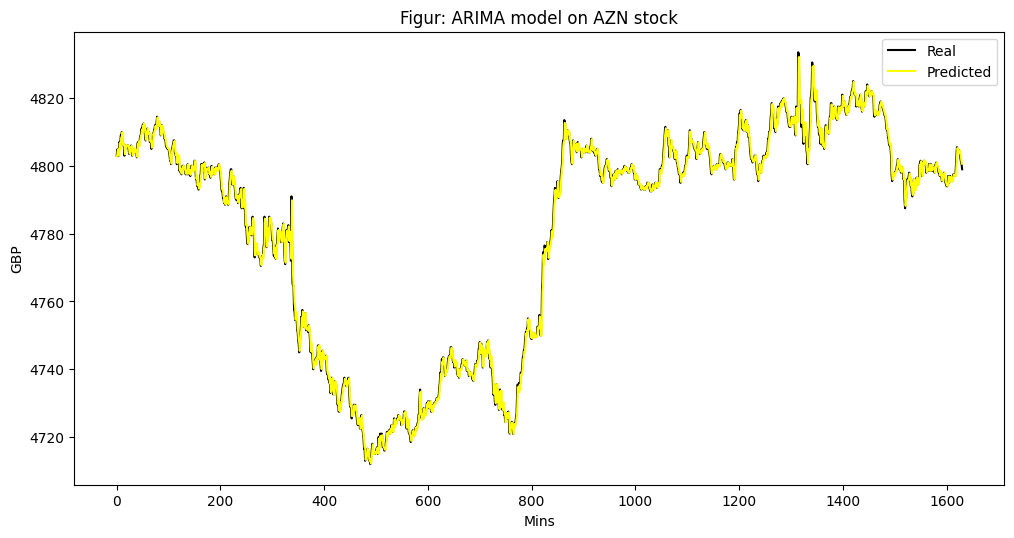

In [ ]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, color='black', label='Real')
plt.plot(predictions, color='yellow', label='Predicted')
plt.xlabel('Mins')
plt.ylabel('GBP')
plt.title('Figur: ARIMA model on AZN stock')
plt.legend()
plt.show()

In [ ]:
print(dataset_ex_df_AZN.head(3))
print(dataset_ex_df_AZN.info())
print('\n Total AZN dataset has {} samples, and {} features.'.format(dataset_ex_df_AZN.shape[0], \
                                                              dataset_ex_df_AZN.shape[1]))

                Dates    Open   Close  ...  momentum  Fourier        ARIMA
0 2018-02-14 08:00:00  4835.5  4832.5  ...    47.325   4832.5  4802.847700
1 2018-02-14 08:01:00  4832.5  4832.5  ...    47.325   4832.5  4803.057467
2 2018-02-14 08:02:00  4834.5  4830.0  ...    47.300   4830.0  4804.386656

[3 rows x 19 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       4796 non-null   datetime64[ns]
 1   Open        4796 non-null   float64       
 2   Close       4796 non-null   float64       
 3   High        4796 non-null   float64       
 4   Low         4796 non-null   float64       
 5   Value       4796 non-null   float64       
 6   Volume      4796 non-null   int64         
 7   ma7         4790 non-null   float64       
 8   ma21        4776 non-null   float64       
 9   26ema       4796 non-null   float64  

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series_TSCO = data_FT_TSCO['Close']
model = ARIMA(series_TSCO, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4477
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2643.814
Method:                       css-mle   S.D. of innovations              0.134
Date:                Mon, 10 Aug 2020   AIC                          -5273.628
Time:                        12:48:35   BIC                          -5228.781
Sample:                             1   HQIC                         -5257.822
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0015      0.002      0.863      0.388      -0.002       0.005
ar.L1.D.Close    -0.0896      0.015     -5.984      0.000      -0.119      -0.060
ar.L2.D.Close     0.0319      0.015     

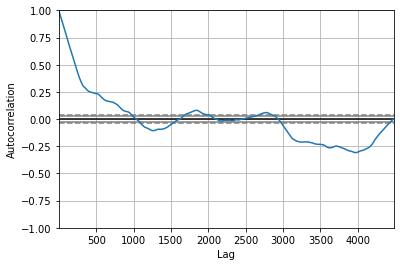

<Figure size 800x560 with 0 Axes>

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_TSCO)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [ ]:
from pandas import datetime
from pandas import DataFrame


X = series_TSCO.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

dataset_TI_df_TSCO['ARIMA'] = pd.DataFrame(predictions)

In [ ]:
from math import sqrt
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
accuracy = r2_score(test, predictions)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test RMSE: %.3f' % rmse)
print('Test accuracy: %.3f' % accuracy)

Test MSE: 0.021
Test MAE: 0.092
Test RMSE: 0.146
Test accuracy: 0.997


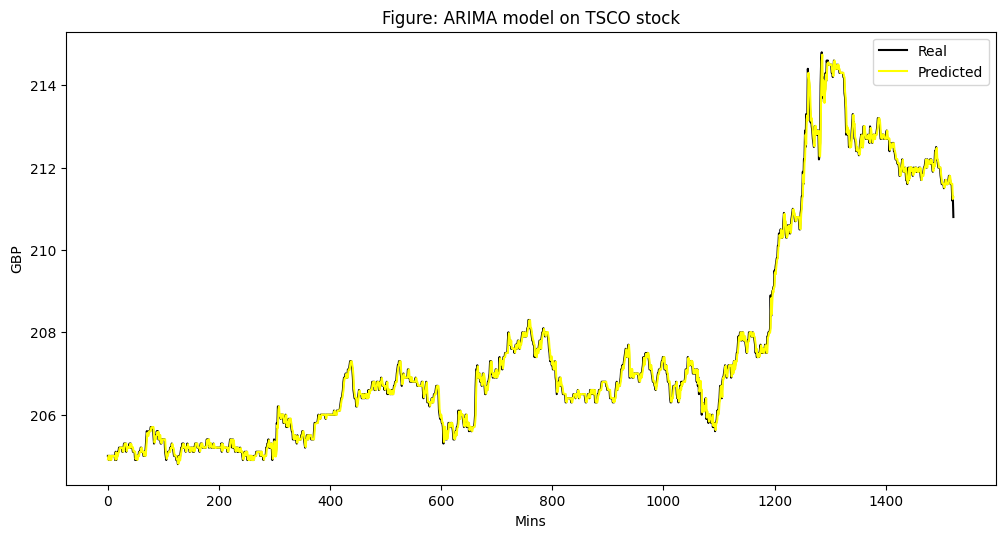

In [ ]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, color='black', label='Real')
plt.plot(predictions, color='yellow', label='Predicted')
plt.xlabel('Mins')
plt.ylabel('GBP')
plt.title('Figure: ARIMA model on TSCO stock')
plt.legend()
plt.show()

In [ ]:
print(dataset_ex_df_TSCO.head(3))
print(dataset_ex_df_TSCO.info())
print('\n Total TSCO dataset has {} samples, and {} features.'.format(dataset_ex_df_TSCO.shape[0], \
                                                              dataset_ex_df_TSCO.shape[1]))

                Dates   Open  Close  ...  momentum  Fourier       ARIMA
0 2018-02-14 08:00:00  204.0  204.0  ...     1.040    204.0  204.915684
1 2018-02-14 08:01:00  204.1  204.1  ...     1.041    204.1  204.994430
2 2018-02-14 08:02:00  204.2  204.1  ...     1.041    204.1  205.006021

[3 rows x 19 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       4478 non-null   datetime64[ns]
 1   Open        4478 non-null   float64       
 2   Close       4478 non-null   float64       
 3   High        4478 non-null   float64       
 4   Low         4478 non-null   float64       
 5   Value       4478 non-null   float64       
 6   Volume      4478 non-null   int64         
 7   ma7         4472 non-null   float64       
 8   ma21        4458 non-null   float64       
 9   26ema       4478 non-null   float64       
 10  1

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series_AAL = data_FT_AAL['Close']
model = ARIMA(series_AAL, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5573
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11251.805
Method:                       css-mle   S.D. of innovations              1.822
Date:                Mon, 10 Aug 2020   AIC                          22517.611
Time:                        13:04:10   BIC                          22563.990
Sample:                             1   HQIC                         22533.777
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0182      0.023      0.803      0.422      -0.026       0.063
ar.L1.D.Close    -0.0643      0.013     -4.802      0.000      -0.091      -0.038
ar.L2.D.Close     0.0355      0.013     

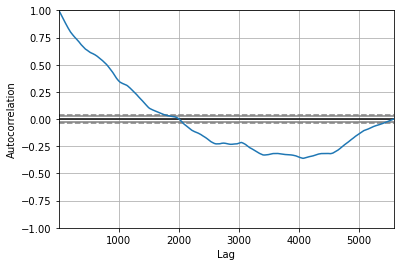

<Figure size 800x560 with 0 Axes>

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_AAL)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [ ]:
from pandas import datetime
from pandas import DataFrame


X = series_AAL.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

dataset_TI_df_AAL['ARIMA'] = pd.DataFrame(predictions)

In [ ]:
from math import sqrt
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
accuracy = r2_score(test, predictions)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test RMSE: %.3f' % rmse)
print('Test accuracy: %.3f' % accuracy)

Test MSE: 2.349
Test MAE: 1.007
Test RMSE: 1.533
Test accuracy: 0.996


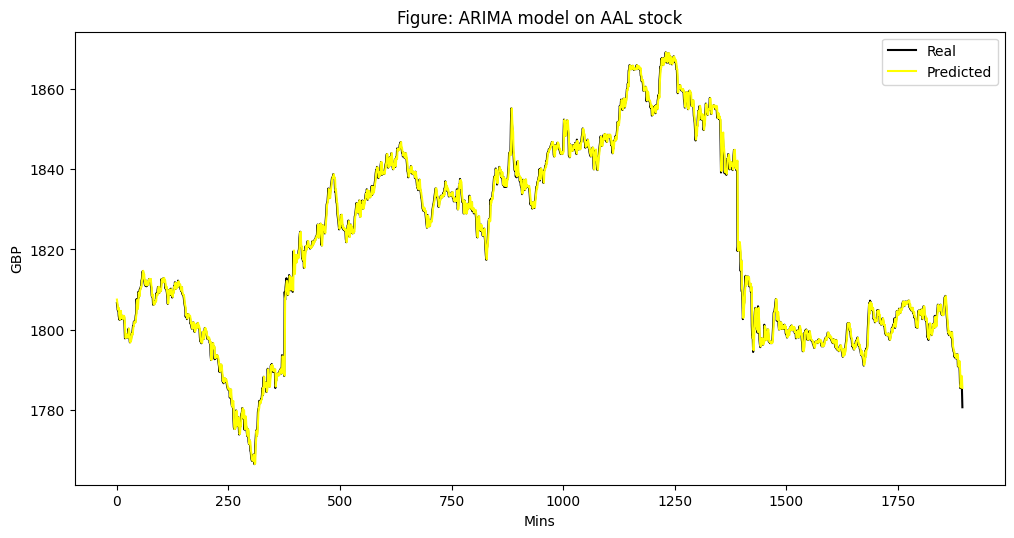

In [ ]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, color='black', label='Real')
plt.plot(predictions, color='yellow', label='Predicted')
plt.xlabel('Mins')
plt.ylabel('GBP')
plt.title('Figure: ARIMA model on AAL stock')
plt.legend()
plt.show()

In [ ]:
print(dataset_ex_df_AAL.head(3))
print(dataset_ex_df_AAL.info())
print('\n Total AAL dataset has {} samples, and {} features.'.format(dataset_ex_df_AAL.shape[0], \
                                                              dataset_ex_df_AAL.shape[1]))

                Dates    Open   Close  ...  momentum  Fourier        ARIMA
0 2018-02-14 08:00:00  1682.0  1679.8  ...    15.798   1679.8  1807.473879
1 2018-02-14 08:01:00  1679.8  1680.8  ...    15.808   1680.8  1806.620607
2 2018-02-14 08:02:00  1681.2  1679.0  ...    15.790   1679.0  1805.692852

[3 rows x 19 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       5574 non-null   datetime64[ns]
 1   Open        5574 non-null   float64       
 2   Close       5574 non-null   float64       
 3   High        5574 non-null   float64       
 4   Low         5574 non-null   float64       
 5   Value       5574 non-null   float64       
 6   Volume      5574 non-null   int64         
 7   ma7         5568 non-null   float64       
 8   ma21        5554 non-null   float64       
 9   26ema       5574 non-null   float64  

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series_DGE = data_FT_DGE['Close']
model = ARIMA(series_DGE, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5369
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8031.148
Method:                       css-mle   S.D. of innovations              1.080
Date:                Mon, 10 Aug 2020   AIC                          16076.295
Time:                        13:14:44   BIC                          16122.414
Sample:                             1   HQIC                         16092.401
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0024      0.014     -0.169      0.866      -0.031       0.026
ar.L1.D.Close    -0.0246      0.014     -1.802      0.072      -0.051       0.002
ar.L2.D.Close     0.0339      0.014     

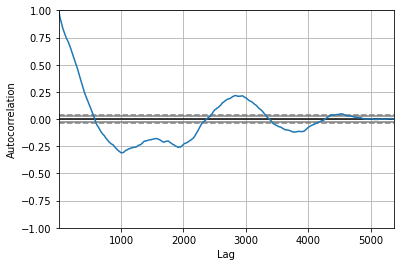

<Figure size 800x560 with 0 Axes>

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_DGE)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [ ]:
from pandas import datetime
from pandas import DataFrame


X = series_DGE.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

dataset_TI_df_DGE['ARIMA'] = pd.DataFrame(predictions)

In [ ]:
from math import sqrt
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
accuracy = r2_score(test, predictions)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test RMSE: %.3f' % rmse)
print('Test accuracy: %.3f' % accuracy)

Test MSE: 0.809
Test MAE: 0.630
Test RMSE: 0.899
Test accuracy: 0.992


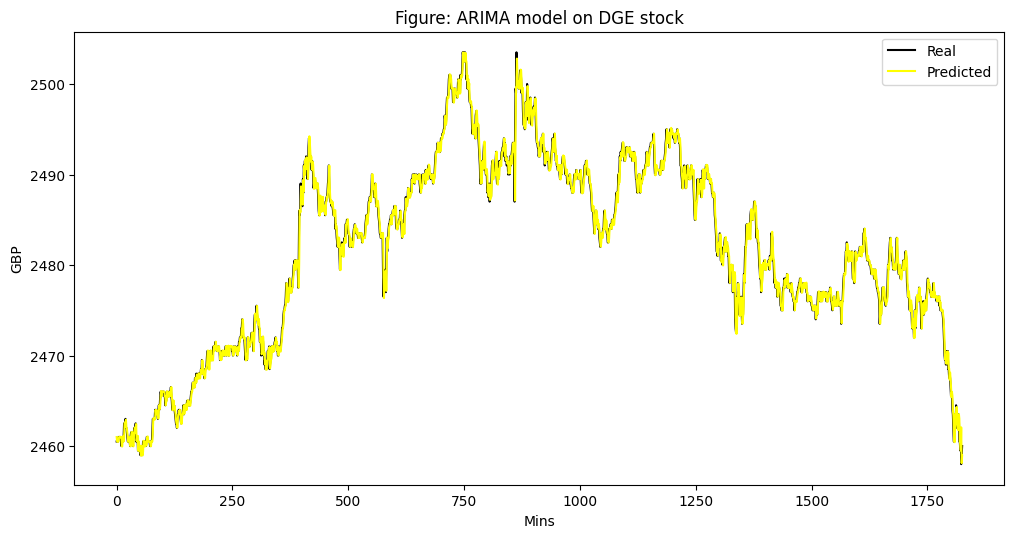

In [ ]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, color='black', label='Real')
plt.plot(predictions, color='yellow', label='Predicted')
plt.xlabel('Mins')
plt.ylabel('GBP')
plt.title('Figure: ARIMA model on DGE stock')
plt.legend()
plt.show()

In [ ]:
print(dataset_ex_df_DGE.head(3))
print(dataset_ex_df_DGE.info())
print('\n Total DGE dataset has {} samples, and {} features.'.format(dataset_ex_df_DGE.shape[0], \
                                                              dataset_ex_df_DGE.shape[1]))

                Dates    Open   Close  ...  momentum  Fourier        ARIMA
0 2018-02-14 08:00:00  2473.0  2473.0  ...    23.730   2473.0  2460.993090
1 2018-02-14 08:01:00  2474.0  2474.5  ...    23.745   2474.5  2460.495066
2 2018-02-14 08:02:00  2476.0  2475.0  ...    23.750   2475.0  2460.487199

[3 rows x 19 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       5370 non-null   datetime64[ns]
 1   Open        5370 non-null   float64       
 2   Close       5370 non-null   float64       
 3   High        5370 non-null   float64       
 4   Low         5370 non-null   float64       
 5   Value       5370 non-null   float64       
 6   Volume      5370 non-null   int64         
 7   ma7         5364 non-null   float64       
 8   ma21        5350 non-null   float64       
 9   26ema       5370 non-null   float64  

#Feature Selection

*Importance of all features*

In [ ]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Close']
    X = data.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

In [ ]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(dataset_ex_df_RDSB)

In [ ]:
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)

In [ ]:
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)

[13:24:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
eval_result = regressor.evals_result()

In [ ]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

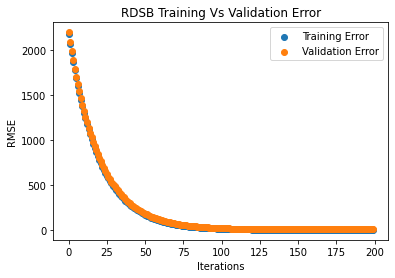

In [ ]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('RDSB Training Vs Validation Error')
plt.legend()
plt.show()

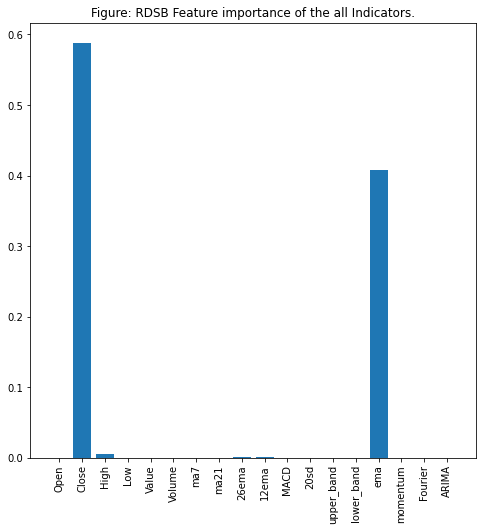

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure: RDSB Feature importance of the all Indicators.')
plt.show()

In [ ]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Close']
    X = data.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

[13:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


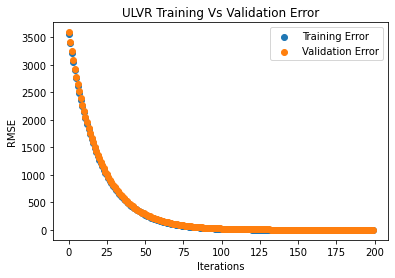

In [ ]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(dataset_ex_df_ULVR)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
eval_result = regressor.evals_result()


training_rounds = range(len(eval_result['validation_0']['rmse']))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('ULVR Training Vs Validation Error')
plt.legend()
plt.show()

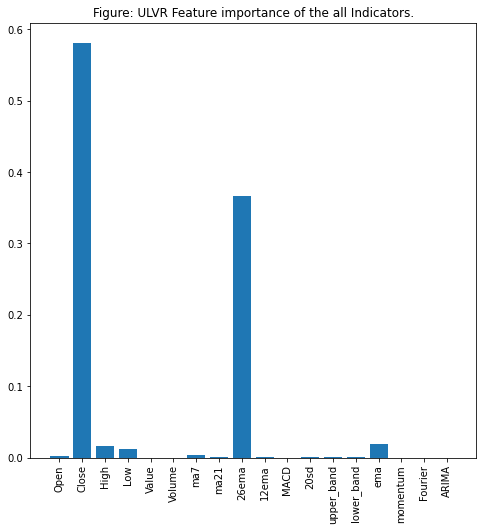

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure: ULVR Feature importance of the all Indicators.')
plt.show()

In [ ]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Close']
    X = data.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

[13:26:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


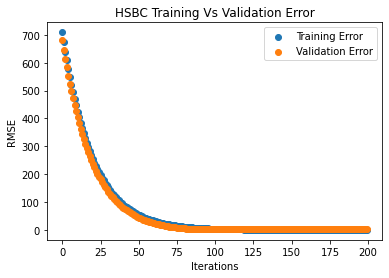

In [ ]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(dataset_ex_df_HSBC)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
eval_result = regressor.evals_result()


training_rounds = range(len(eval_result['validation_0']['rmse']))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('HSBC Training Vs Validation Error')
plt.legend()
plt.show()

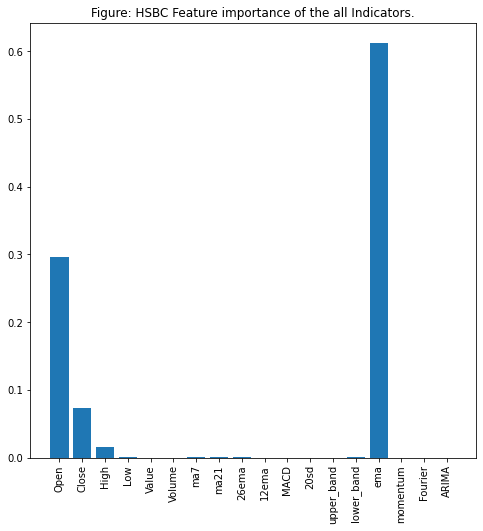

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure: HSBC Feature importance of the all Indicators.')
plt.show()

In [ ]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Close']
    X = data.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

[13:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


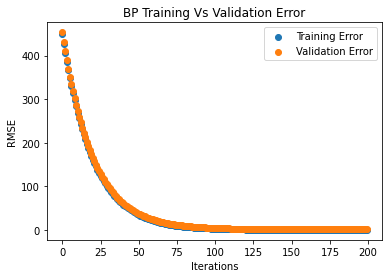

In [ ]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(dataset_ex_df_BP)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
eval_result = regressor.evals_result()


training_rounds = range(len(eval_result['validation_0']['rmse']))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('BP Training Vs Validation Error')
plt.legend()
plt.show()

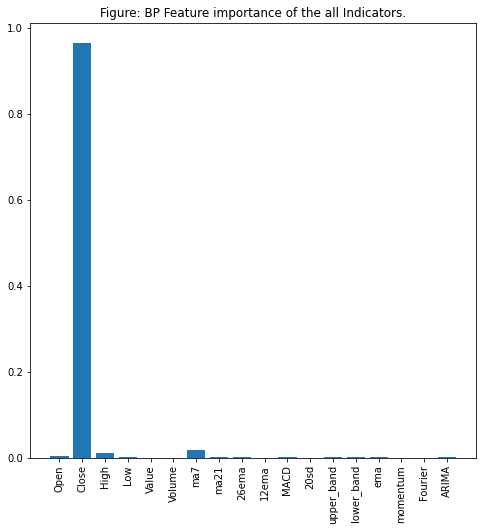

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure: BP Feature importance of the all Indicators.')
plt.show()

In [ ]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Close']
    X = data.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

[14:28:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


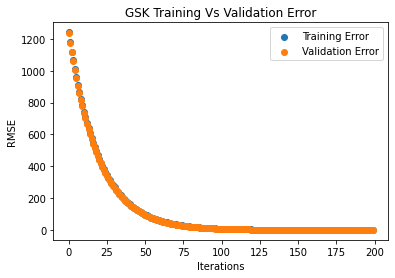

In [ ]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(dataset_ex_df_GSK)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
eval_result = regressor.evals_result()


training_rounds = range(len(eval_result['validation_0']['rmse']))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('GSK Training Vs Validation Error')
plt.legend()
plt.show()

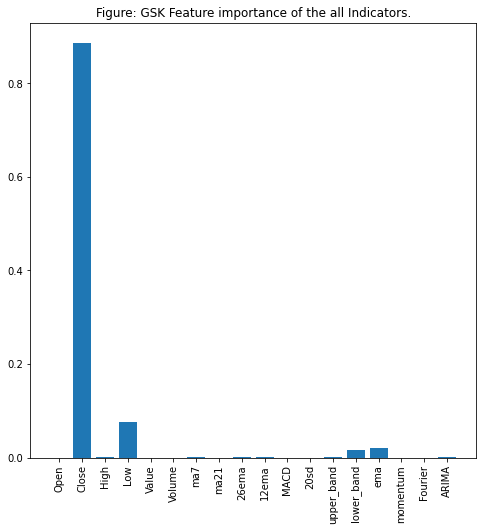

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure: GSK Feature importance of the all Indicators.')
plt.show()

In [ ]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Close']
    X = data.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

[13:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


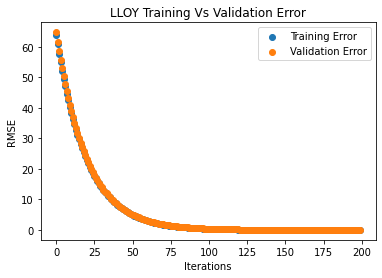

In [ ]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(dataset_ex_df_LLOY)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
eval_result = regressor.evals_result()


training_rounds = range(len(eval_result['validation_0']['rmse']))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('LLOY Training Vs Validation Error')
plt.legend()
plt.show()

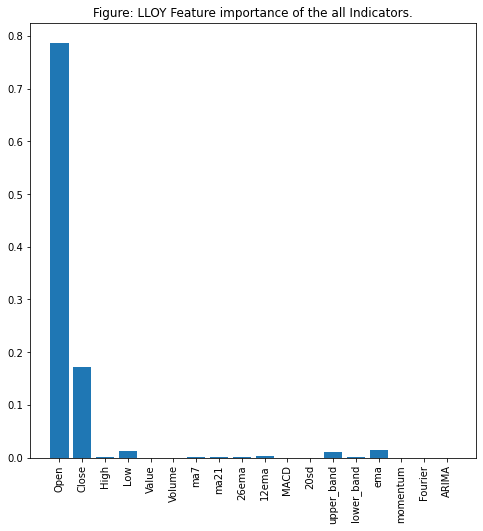

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure: LLOY Feature importance of the all Indicators.')
plt.show()

In [ ]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Close']
    X = data.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

[13:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


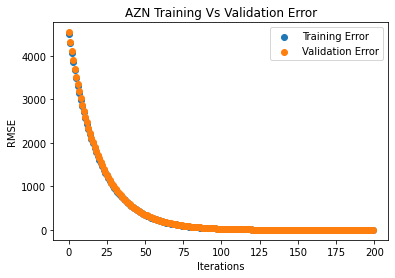

In [ ]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(dataset_ex_df_AZN)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
eval_result = regressor.evals_result()


training_rounds = range(len(eval_result['validation_0']['rmse']))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('AZN Training Vs Validation Error')
plt.legend()
plt.show()

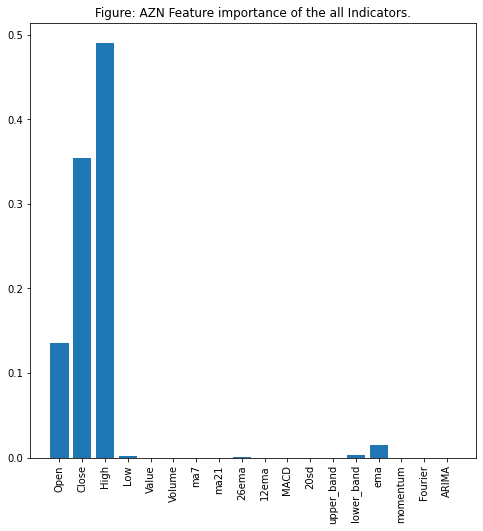

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure: AZN Feature importance of the all Indicators.')
plt.show()

In [ ]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Close']
    X = data.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

[13:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


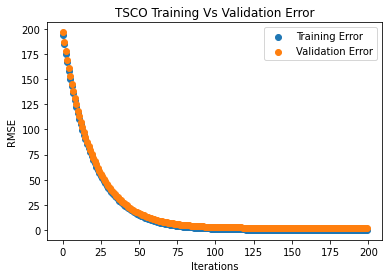

In [ ]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(dataset_ex_df_TSCO)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
eval_result = regressor.evals_result()


training_rounds = range(len(eval_result['validation_0']['rmse']))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('TSCO Training Vs Validation Error')
plt.legend()
plt.show()

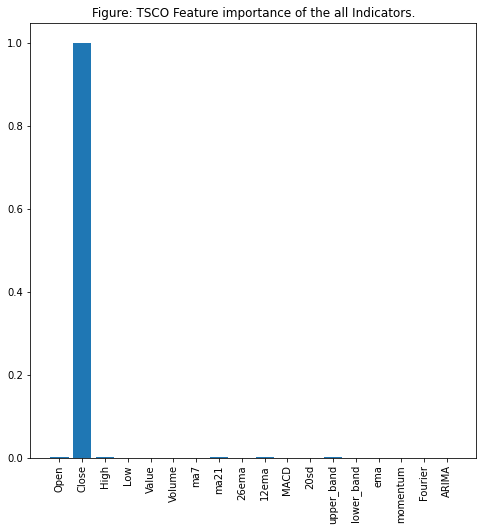

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure: TSCO Feature importance of the all Indicators.')
plt.show()

In [ ]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Close']
    X = data.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

[13:45:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


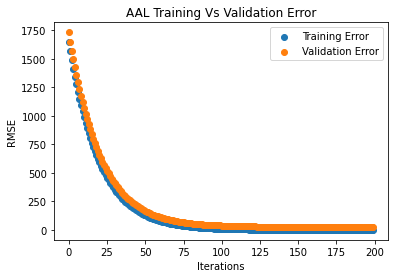

In [ ]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(dataset_ex_df_AAL)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
eval_result = regressor.evals_result()


training_rounds = range(len(eval_result['validation_0']['rmse']))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('AAL Training Vs Validation Error')
plt.legend()
plt.show()

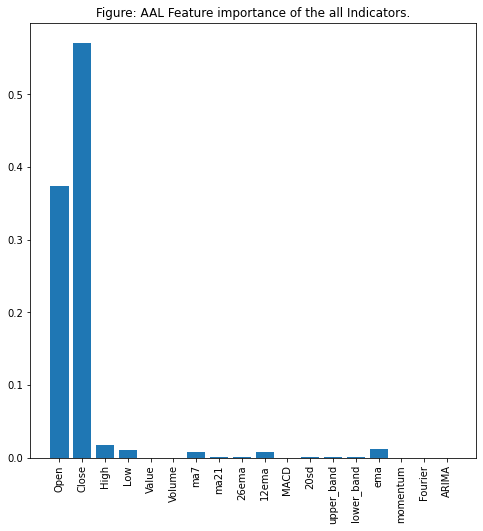

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure: AAL Feature importance of the all Indicators.')
plt.show()

In [ ]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Close']
    X = data.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

[13:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


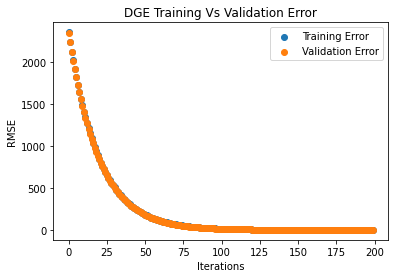

In [ ]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(dataset_ex_df_DGE)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
eval_result = regressor.evals_result()


training_rounds = range(len(eval_result['validation_0']['rmse']))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('DGE Training Vs Validation Error')
plt.legend()
plt.show()

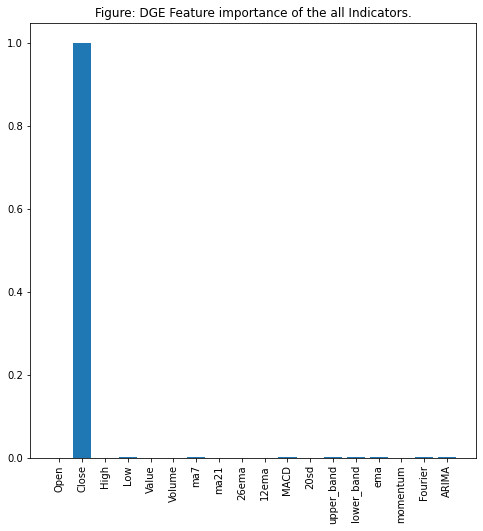

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure: DGE Feature importance of the all Indicators.')
plt.show()

#Pre-Processing

*Scenario 1*

In [ ]:
#Five most significant features
dataset_S1_RDSB = dataset_ex_df_RDSB[['Dates','Close','High','26ema','12ema','ema']]
dataset_S1_RDSB.fillna(0, inplace=True) 
dataset_S1_RDSB.head(2)                              

Dates   Close    High        26ema      12ema       ema
0 2018-02-14 08:00:00  2315.5  2319.0  2315.500000  2315.5000  2315.500
1 2018-02-14 08:01:00  2314.0  2316.5  2314.721154  2314.6875  2314.375

In [ ]:
dataset_S1_ULVR = dataset_ex_df_ULVR[['Dates','Open','Close','High','Low','ma7','ma21','26ema','12ema', '20sd','upper_band','ema']]
print(dataset_S1_ULVR.fillna(0, inplace=True))
print(dataset_S1_ULVR.head(2))

None
                Dates    Open   Close  ...  20sd  upper_band       ema
0 2018-02-14 08:00:00  3805.0  3797.5  ...   0.0         0.0  3797.500
1 2018-02-14 08:01:00  3801.0  3800.0  ...   0.0         0.0  3799.375

[2 rows x 12 columns]


In [ ]:
dataset_S1_HSBC = dataset_ex_df_HSBC[['Dates','Open','Close','High','Low','ma7','ma21','26ema','lower_band','ema']]
print(dataset_S1_HSBC.fillna(0, inplace=True))
print(dataset_S1_HSBC.head(2))

None
                Dates   Open  Close  ...       26ema  lower_band      ema
0 2018-02-14 08:00:00  751.0  749.2  ...  749.200000         0.0  749.200
1 2018-02-14 08:01:00  749.2  749.9  ...  749.563462         0.0  749.725

[2 rows x 10 columns]


In [ ]:
dataset_S1_BP = dataset_ex_df_BP[['Dates','Open','Close','High','Low','ma7','ma21','26ema','MACD','upper_band','lower_band','ema','ARIMA']]
print(dataset_S1_BP.fillna(0, inplace=True))
print(dataset_S1_BP.head(2))

None
                Dates    Open   Close  ...  lower_band       ema       ARIMA
0 2018-02-14 08:00:00  477.00  476.70  ...         0.0  476.7000  470.195786
1 2018-02-14 08:01:00  477.05  476.25  ...         0.0  476.3625  470.191943

[2 rows x 13 columns]


In [ ]:
dataset_S1_GSK = dataset_ex_df_GSK[['Dates','Close','High','Low','ma7','26ema','12ema', 'upper_band','lower_band','ema','ARIMA']]
print(dataset_S1_GSK.fillna(0, inplace=True))
print(dataset_S1_GSK.head(2))

None
                Dates   Close    High  ...  lower_band     ema        ARIMA
0 2018-02-14 08:01:00  1292.8  1294.0  ...         0.0  1292.8  1299.319966
1 2018-02-14 08:00:00  1288.8  1293.0  ...         0.0  1289.8  1298.790351

[2 rows x 11 columns]


In [ ]:
dataset_S1_LLOY = dataset_ex_df_LLOY[['Dates','Open','Close','High','Low','ma7','ma21','26ema','12ema', 'upper_band','lower_band','ema']]
print(dataset_S1_LLOY.fillna(0, inplace=True))
print(dataset_S1_LLOY.head(2))

None
                Dates   Open  Close  ...  upper_band  lower_band      ema
0 2018-02-14 08:00:00  67.00  67.07  ...         0.0         0.0  67.0700
1 2018-02-14 08:01:00  67.17  67.16  ...         0.0         0.0  67.1375

[2 rows x 12 columns]


In [ ]:
dataset_S1_AZN = dataset_ex_df_AZN[['Dates','Open','Close','High','Low','26ema','lower_band','ema']]
print(dataset_S1_AZN.fillna(0, inplace=True))
print(dataset_S1_AZN.head(2))

None
                Dates    Open   Close  ...   26ema  lower_band     ema
0 2018-02-14 08:00:00  4835.5  4832.5  ...  4832.5         0.0  4832.5
1 2018-02-14 08:01:00  4832.5  4832.5  ...  4832.5         0.0  4832.5

[2 rows x 8 columns]


In [ ]:
dataset_S1_TSCO = dataset_ex_df_TSCO[['Dates','Open','Close','High','ma21','12ema', 'upper_band']]
print(dataset_S1_TSCO.fillna(0, inplace=True))
print(dataset_S1_TSCO.head(2))

None
                Dates   Open  Close   High  ma21       12ema  upper_band
0 2018-02-14 08:00:00  204.0  204.0  204.0   0.0  204.000000         0.0
1 2018-02-14 08:01:00  204.1  204.1  204.1   0.0  204.054167         0.0


In [ ]:
dataset_S1_AAL = dataset_ex_df_AAL[['Dates','Open','Close','High','Low','ma7','ma21','26ema','12ema', '20sd','upper_band','lower_band','ema']]
print(dataset_S1_AAL.fillna(0, inplace=True))
print(dataset_S1_AAL.head(2))

None
                Dates    Open   Close  ...  upper_band  lower_band      ema
0 2018-02-14 08:00:00  1682.0  1679.8  ...         0.0         0.0  1679.80
1 2018-02-14 08:01:00  1679.8  1680.8  ...         0.0         0.0  1680.55

[2 rows x 13 columns]


In [ ]:
dataset_S1_DGE = dataset_ex_df_DGE[['Dates','Close','Low','ma7','MACD','upper_band','lower_band','ema','Fourier','ARIMA']]
print(dataset_S1_DGE.fillna(0, inplace=True))
print(dataset_S1_DGE.head(2))

None
                Dates   Close     Low  ...       ema  Fourier        ARIMA
0 2018-02-14 08:00:00  2473.0  2472.0  ...  2473.000   2473.0  2460.993090
1 2018-02-14 08:01:00  2474.5  2474.0  ...  2474.125   2474.5  2460.495066

[2 rows x 10 columns]


*Scenario 2*

In [ ]:
#All features
dataset_S2_RDSB = dataset_ex_df_RDSB
dataset_S2_RDSB.fillna(0, inplace=True) ##################
dataset_S2_RDSB.head(2)


Dates    Open   Close  ...  momentum  Fourier        ARIMA
0 2018-02-14 08:00:00  2319.0  2315.5  ...    22.155   2315.5  2280.999660
1 2018-02-14 08:01:00  2316.5  2314.0  ...    22.140   2314.0  2280.965854

[2 rows x 19 columns]

#Optimal-Modeling Filter

**2.Optimal DRL model for ideal Buy/sell decision**


1.   Trigger2 -> TA2-> Request2 -> Layer2 -> Train Q Learning Agents and  Policy Gradient Agents
2.   Select DRL model with optimal performance metrics for lowest execution time
3.   Test optimal DRL model



*Scenario-1*

**RDSB**

In [ ]:
def get_mean(df, col):
    """
    Given a dataframe, get mean and std dev at timestep t using values from t-1, t-2, ..., t-N.
    Inputs
        df         : dataframe. Can be of any length.
        col        : name of the column you want to calculate mean and std dev
        N          : get mean and std dev at timestep t using values from t-1, t-2, ..., t-N
    Outputs
        df_out     : same as df but with additional column containing mean and std dev
    """
    mean_list = df.mean(axis=1) # len(mean_list) = len(df)
     
    # Add one timestep to the predictions
    #mean_list = np.concatenate((np.array([np.nan]), np.array(mean_list[:-1])))
    #std_list = np.concatenate((np.array([np.nan]), np.array(std_list[:-1])))
    
    # Append mean_list to df
    df_out = df.copy()
    df_out[col + '_mean'] = mean_list
    #df_out[col + '_std'] = std_list
    
    return df_out

In [ ]:
df1_RDSB = dataset_S1_RDSB[['Dates','Close','High','26ema', '12ema', 'ema']]
df1_RDSB.head(2)

Dates   Close    High        26ema      12ema       ema
0 2018-02-14 08:00:00  2315.5  2319.0  2315.500000  2315.5000  2315.500
1 2018-02-14 08:01:00  2314.0  2316.5  2314.721154  2314.6875  2314.375

In [ ]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(df1_RDSB) + 1, 1)

In [ ]:
cols_list = [
"Close",
"12ema",
"26ema",
"High",
"ema"
]

for col in cols_list:
    ORDSB_avg = get_mean(df1_RDSB, col)
ORDSB_avg.head(3)

Dates   Close    High  ...        12ema          ema     ema_mean
0 2018-02-14 08:00:00  2315.5  2319.0  ...  2315.500000  2315.500000  2316.200000
1 2018-02-14 08:01:00  2314.0  2316.5  ...  2314.687500  2314.375000  2314.856731
2 2018-02-14 08:02:00  2306.0  2312.0  ...  2311.296767  2308.576923  2309.892284

[3 rows x 7 columns]

In [ ]:
df1_RDSB = ORDSB_avg.drop(['High','12ema','26ema'],axis=1)
df1_RDSB.head(3)

Dates   Close          ema     ema_mean
0 2018-02-14 08:00:00  2315.5  2315.500000  2316.200000
1 2018-02-14 08:01:00  2314.0  2314.375000  2314.856731
2 2018-02-14 08:02:00  2306.0  2308.576923  2309.892284

In [ ]:
name = 'Policy Gradient agent'
class PGAgent:

    LEARNING_RATE = 1e-4
    LAYER_SIZE = 256
    GAMMA = 0.9
    OUTPUT_SIZE = 3

    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.X = tf.placeholder(tf.float32, (None, self.state_size))
        self.REWARDS = tf.placeholder(tf.float32, (None))
        self.ACTIONS = tf.placeholder(tf.int32, (None))
        feed_forward = tf.layers.dense(self.X, self.LAYER_SIZE, activation = tf.nn.relu)
        self.logits = tf.layers.dense(feed_forward, self.OUTPUT_SIZE, activation = tf.nn.softmax)
        input_y = tf.one_hot(self.ACTIONS, self.OUTPUT_SIZE)
        loglike = tf.log((input_y * (input_y - self.logits) + (1 - input_y) * (input_y + self.logits)) + 1)
        rewards = tf.tile(tf.reshape(self.REWARDS, (-1,1)), [1, self.OUTPUT_SIZE])
        self.cost = -tf.reduce_mean(loglike * (rewards + 1)) 
        self.optimizer = tf.train.AdamOptimizer(learning_rate = self.LEARNING_RATE).minimize(self.cost)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def predict(self, inputs):
        return self.sess.run(self.logits, feed_dict={self.X:inputs})
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    
    def discount_rewards(self, r):
        discounted_r = np.zeros_like(r)
        running_add = 0
        for t in reversed(range(0, r.size)):
            running_add = running_add * self.GAMMA + r[t]
            discounted_r[t] = running_add
        return discounted_r
    
    def get_predicted_action(self, sequence):
        prediction = self.predict(np.array(sequence))[0]
        return np.argmax(prediction)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.get_predicted_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('mins %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
                
                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'mins %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            ep_history = []
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.get_predicted_action(state)
                next_state = self.get_state(t + 1)
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= close[t]
                
                elif action == 2 and len(inventory):
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                ep_history.append([state,action,starting_money,next_state])
                state = next_state
            ep_history = np.array(ep_history)
            ep_history[:,2] = self.discount_rewards(ep_history[:,2])
            cost, _ = self.sess.run([self.cost, self.optimizer], feed_dict={self.X:np.vstack(ep_history[:,0]),
                                                    self.REWARDS:ep_history[:,2],
                                                    self.ACTIONS:ep_history[:,1]})
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [ ]:
close = df1_RDSB.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = PGAgent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: -92.014023.3, cost: -23758.791016, total money: 9907.985977
epoch: 20, total rewards: -37.839911.3, cost: -19090.148438, total money: 9962.160089
epoch: 30, total rewards: -50.400119.3, cost: -15510.344727, total money: 9949.599881
epoch: 40, total rewards: -42.399232.3, cost: -13535.121094, total money: 9957.600768
epoch: 50, total rewards: 9.339742.3, cost: -13080.153320, total money: 10009.339742
epoch: 60, total rewards: 28.859709.3, cost: -13539.896484, total money: 10028.859709
epoch: 70, total rewards: 82.225884.3, cost: -13316.500000, total money: 10082.225884
epoch: 80, total rewards: 25.865680.3, cost: -13168.514648, total money: 10025.865680
epoch: 90, total rewards: -5.726560.3, cost: -12779.806641, total money: 9994.273440
epoch: 100, total rewards: 16.399467.3, cost: -12916.079102, total money: 10016.399467
epoch: 110, total rewards: 7.573975.3, cost: -12568.171875, total money: 10007.573975
epoch: 120, total rewards: 0.139953.3, cost: -12537.930

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 0: buy 1 unit at price 2316.200000, total balance 7683.800000
mins 1: buy 1 unit at price 2314.856731, total balance 5368.943269
mins 3, sell 1 unit at price 2308.624607, investment -0.327061 %, total balance 7677.567877,
mins 4, sell 1 unit at price 2309.172366, investment -0.245560 %, total balance 9986.740243,
mins 7: buy 1 unit at price 2307.900172, total balance 7678.840070
mins 9: buy 1 unit at price 2307.981414, total balance 5370.858657
mins 10, sell 1 unit at price 2307.818642, investment -0.003533 %, total balance 7678.677299,
mins 11: buy 1 unit at price 2308.570754, total balance 5370.106544
mins 13: buy 1 unit at price 2308.651345, total balance 3061.455199
mins 14: buy 1 unit at price 2309.140875, total balance 752.314324
mins 16, sell 1 unit at price 2307.374711, investment -0.026287 %, total balance 3059.689035,
mins 17: buy 1 unit at price 2307.633430, total balance 752.055605
mins 21, sell 1 unit at price 2304.700051, investment -0.167667 %, total balance 3056.75

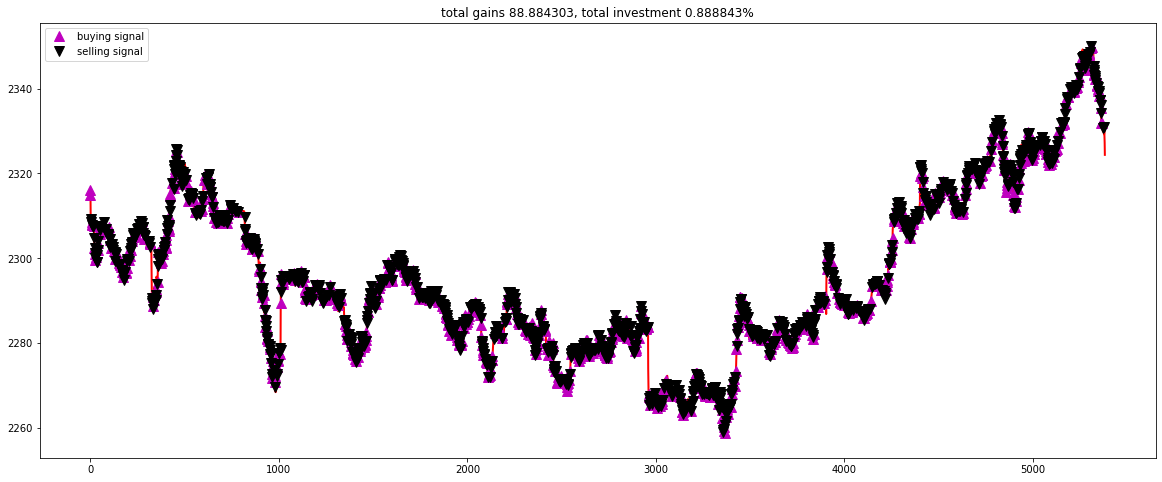

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**ULVR**

In [ ]:
df1_ULVR = dataset_S1_ULVR.drop(['ma7','ma21','20sd','upper_band'],axis=1)
df1_ULVR.head(3)

Dates    Open   Close  ...        26ema        12ema          ema
0 2018-02-14 08:00:00  3805.0  3797.5  ...  3797.500000  3797.500000  3797.500000
1 2018-02-14 08:01:00  3801.0  3800.0  ...  3798.798077  3798.854167  3799.375000
2 2018-02-14 08:02:00  3797.0  3793.0  ...  3796.714884  3796.569284  3794.961538

[3 rows x 8 columns]

In [ ]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(df1_ULVR) + 1, 1)

In [ ]:
cols_list = [
"Open",
"High",
"Low",
"Close",
"12ema",
"26ema",
"High",
"ema"
]

for col in cols_list:
    OULVR_avg = get_mean(df1_ULVR, col)
OULVR_avg.head(3)

Dates    Open   Close  ...        12ema          ema     ema_mean
0 2018-02-14 08:00:00  3805.0  3797.5  ...  3797.500000  3797.500000  3799.785714
1 2018-02-14 08:01:00  3801.0  3800.0  ...  3798.854167  3799.375000  3799.861035
2 2018-02-14 08:02:00  3797.0  3793.0  ...  3796.569284  3794.961538  3795.463672

[3 rows x 9 columns]

In [ ]:
#df1_ULVR = OULVR_avg.drop(['Open','High','Low','26ema','12ema'],axis=1)
df1_ULVR.head(3)

Dates   Close          ema     ema_mean
0 2018-02-14 08:00:00  3797.5  3797.500000  3799.785714
1 2018-02-14 08:01:00  3800.0  3799.375000  3799.861035
2 2018-02-14 08:02:00  3793.0  3794.961538  3795.463672

In [ ]:
close = df1_ULVR.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = PGAgent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: -4.500864.3, cost: -20089.560547, total money: 9995.499136
epoch: 20, total rewards: -25.604094.3, cost: -18847.962891, total money: 9974.395906
epoch: 30, total rewards: -19.406247.3, cost: -18138.046875, total money: 9980.593753
epoch: 40, total rewards: -52.722043.3, cost: -18219.800781, total money: 9947.277957
epoch: 50, total rewards: -53.969636.3, cost: -18248.976562, total money: 9946.030364
epoch: 60, total rewards: -14.024002.3, cost: -18820.335938, total money: 9985.975998
epoch: 70, total rewards: 17.906179.3, cost: -18938.031250, total money: 10017.906179
epoch: 80, total rewards: 24.800157.3, cost: -18866.867188, total money: 10024.800157
epoch: 90, total rewards: 0.544311.3, cost: -18818.070312, total money: 10000.544311
epoch: 100, total rewards: -107.907095.3, cost: -18799.439453, total money: 9892.092905
epoch: 110, total rewards: -74.584081.3, cost: -18764.103516, total money: 9925.415919
epoch: 120, total rewards: -53.454345.3, cost: -18626

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 4: buy 1 unit at price 3799.573400, total balance 6200.426600
mins 5: buy 1 unit at price 3798.084727, total balance 2402.341873
mins 6, sell 1 unit at price 3796.915624, investment -0.069949 %, total balance 6199.257497,
mins 7: buy 1 unit at price 3799.431647, total balance 2399.825850
mins 10, sell 1 unit at price 3802.263308, investment 0.110018 %, total balance 6202.089158,
mins 11, sell 1 unit at price 3802.996881, investment 0.093836 %, total balance 10005.086038,
mins 14: buy 1 unit at price 3801.240626, total balance 6203.845412
mins 15: buy 1 unit at price 3801.536048, total balance 2402.309364
mins 20, sell 1 unit at price 3803.641784, investment 0.063168 %, total balance 6205.951148,
mins 22: buy 1 unit at price 3801.662652, total balance 2404.288496
mins 24, sell 1 unit at price 3803.082095, investment 0.040669 %, total balance 6207.370591,
mins 26, sell 1 unit at price 3804.192466, investment 0.066545 %, total balance 10011.563057,
mins 28: buy 1 unit at price 3802.2

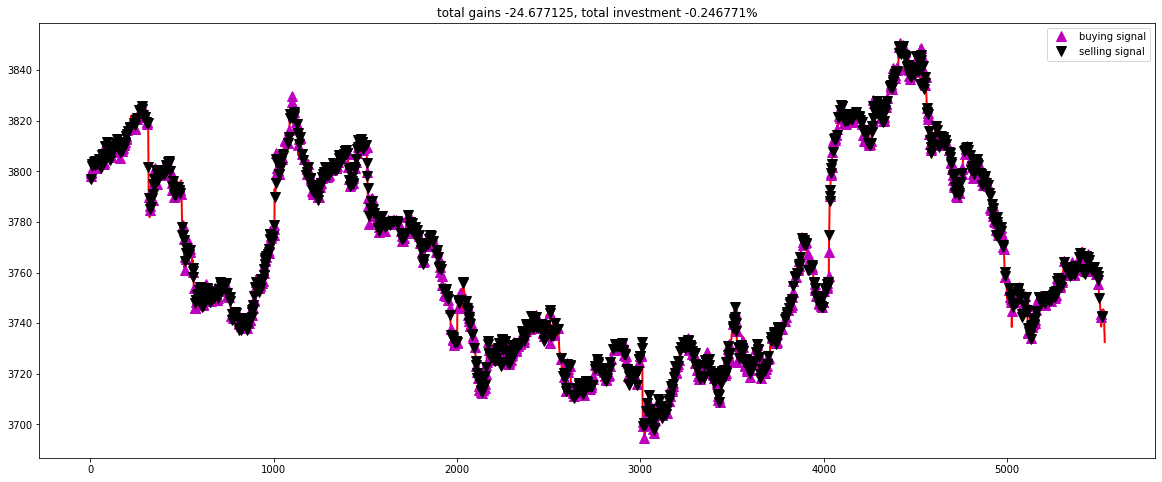

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**HSBC**

In [ ]:
df1_HSBC = dataset_S1_HSBC
df1_HSBC.head(3)

Dates   Open  Close  ...       26ema  lower_band         ema
0 2018-02-14 08:00:00  751.0  749.2  ...  749.200000         0.0  749.200000
1 2018-02-14 08:01:00  749.2  749.9  ...  749.563462         0.0  749.725000
2 2018-02-14 08:02:00  749.7  749.8  ...  749.648448         0.0  749.776923

[3 rows x 10 columns]

In [ ]:
df1_HSBC = df1_HSBC.drop(['ma7','ma21','lower_band'],axis=1)
df1_HSBC.head()

Dates   Open  Close   High    Low       26ema         ema
0 2018-02-14 08:00:00  751.0  749.2  751.0  749.2  749.200000  749.200000
1 2018-02-14 08:01:00  749.2  749.9  750.4  749.2  749.563462  749.725000
2 2018-02-14 08:02:00  749.7  749.8  750.2  749.7  749.648448  749.776923
3 2018-02-14 08:03:00  749.8  750.0  750.2  749.7  749.746726  749.927500
4 2018-02-14 08:04:00  750.0  750.8  750.8  749.9  749.990985  750.511570

In [ ]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(df1_HSBC) + 1, 1)

In [ ]:
cols_list = [
"Open",
"High",
"Low",
"Close",
"26ema",
"ema"
]

for col in cols_list:
    OHSBC_avg = get_mean(df1_HSBC, col)
OHSBC_avg.head(3)

Dates   Open  Close  ...       26ema         ema    ema_mean
0 2018-02-14 08:00:00  751.0  749.2  ...  749.200000  749.200000  749.800000
1 2018-02-14 08:01:00  749.2  749.9  ...  749.563462  749.725000  749.664744
2 2018-02-14 08:02:00  749.7  749.8  ...  749.648448  749.776923  749.804228

[3 rows x 8 columns]

In [ ]:
df1_HSBC = OHSBC_avg.drop(['Open','High','Low','26ema'],axis=1)
df1_HSBC.head()

Dates  Close         ema    ema_mean
0 2018-02-14 08:00:00  749.2  749.200000  749.800000
1 2018-02-14 08:01:00  749.9  749.725000  749.664744
2 2018-02-14 08:02:00  749.8  749.776923  749.804228
3 2018-02-14 08:03:00  750.0  749.927500  749.895704
4 2018-02-14 08:04:00  750.8  750.511570  750.333759

In [ ]:
close = df1_HSBC.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = PGAgent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: -461.365551.3, cost: -6055.089844, total money: 3041.931003
epoch: 20, total rewards: -416.100799.3, cost: -6795.769531, total money: 3086.756461
epoch: 30, total rewards: -439.554415.3, cost: -7030.153320, total money: 3796.761622
epoch: 40, total rewards: -384.034281.3, cost: -7187.136230, total money: 3124.670264
epoch: 50, total rewards: -395.241823.3, cost: -6179.788574, total money: 3831.576588
epoch: 60, total rewards: -383.772021.3, cost: -7213.880859, total money: 3845.413668
epoch: 70, total rewards: -316.107150.3, cost: -7552.789062, total money: 3914.630378
epoch: 80, total rewards: -327.745093.3, cost: -6501.137207, total money: 3908.471796
epoch: 90, total rewards: -259.180390.3, cost: -8302.966797, total money: 6143.306353
epoch: 100, total rewards: -341.835360.3, cost: -7925.937988, total money: 6780.821496
epoch: 110, total rewards: -388.100504.3, cost: -5795.237793, total money: 5291.498400
epoch: 120, total rewards: -324.266428.3, cost: -663

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 0: buy 1 unit at price 749.800000, total balance 9250.200000
mins 1, sell 1 unit at price 749.664744, investment -0.018039 %, total balance 9999.864744,
mins 2: buy 1 unit at price 749.804228, total balance 9250.060515
mins 5: buy 1 unit at price 750.241605, total balance 8499.818910
mins 6: buy 1 unit at price 750.605704, total balance 7749.213206
mins 8: buy 1 unit at price 750.027050, total balance 6999.186156
mins 9: buy 1 unit at price 749.474371, total balance 6249.711785
mins 10: buy 1 unit at price 749.096539, total balance 5500.615246
mins 13: buy 1 unit at price 748.595390, total balance 4752.019855
mins 14: buy 1 unit at price 748.781997, total balance 4003.237859
mins 15: buy 1 unit at price 748.826236, total balance 3254.411623
mins 16: buy 1 unit at price 748.969545, total balance 2505.442078
mins 17: buy 1 unit at price 749.283423, total balance 1756.158655
mins 18: buy 1 unit at price 749.473576, total balance 1006.685079
mins 19: buy 1 unit at price 749.236602, to

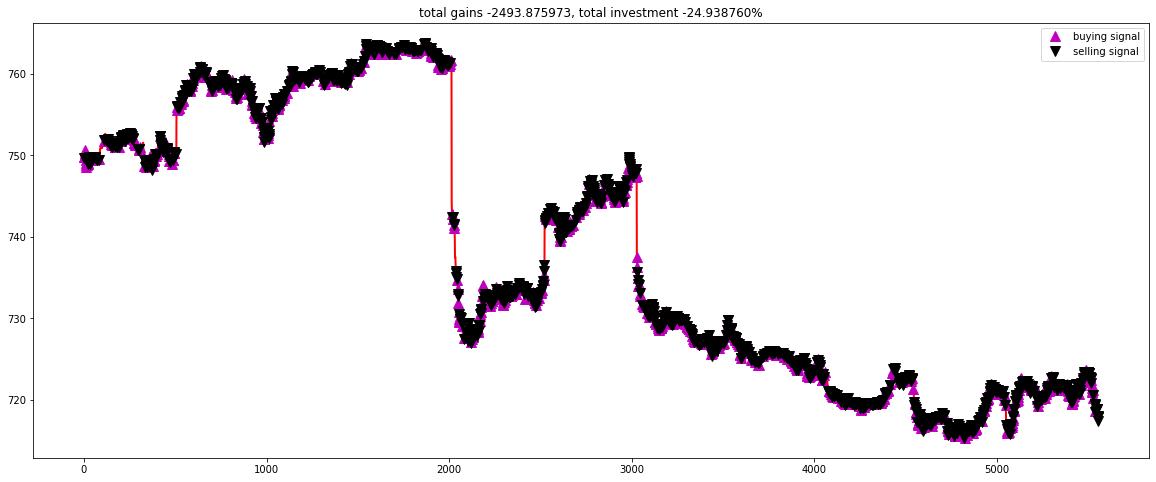

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

In [ ]:
#df1_BP = dataset_S1_BP.drop(['ma7','ma21','MACD','upper_band','lower_band'],axis=1)
df1_BP = df1_BP.drop(['ARIMA'],axis=1)
df1_BP.head(3)

Dates    Open   Close    High     Low       26ema         ema
0 2018-02-14 08:00:00  477.00  476.70  478.00  476.50  476.700000  476.700000
1 2018-02-14 08:01:00  477.05  476.25  477.05  476.25  476.466346  476.362500
2 2018-02-14 08:02:00  476.05  475.00  476.05  475.00  475.939502  475.419231

In [ ]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(df1_BP) + 1, 1)

In [ ]:
cols_list = [
"Open",
"High",
"Low",
"Close",
"26ema",
"ema"
]

for col in cols_list:
    OBP_avg = get_mean(df1_BP, col)
OBP_avg.head(3)

Dates    Open   Close  ...       26ema         ema    ema_mean
0 2018-02-14 08:00:00  477.00  476.70  ...  476.700000  476.700000  476.933333
1 2018-02-14 08:01:00  477.05  476.25  ...  476.466346  476.362500  476.571474
2 2018-02-14 08:02:00  476.05  475.00  ...  475.939502  475.419231  475.576455

[3 rows x 8 columns]

In [ ]:
df1_BP = OBP_avg.drop(['Open','High','Low','26ema'],axis=1)
df1_BP.head(3)

Dates   Close         ema    ema_mean
0 2018-02-14 08:00:00  476.70  476.700000  476.933333
1 2018-02-14 08:01:00  476.25  476.362500  476.571474
2 2018-02-14 08:02:00  475.00  475.419231  475.576455

In [ ]:
close = df1_BP.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = PGAgent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 22.966402.3, cost: -28266.515625, total money: 10022.966402
epoch: 20, total rewards: -58.339211.3, cost: -24066.683594, total money: 9941.660789
epoch: 30, total rewards: -80.614265.3, cost: -13061.735352, total money: 6574.694042
epoch: 40, total rewards: 27.302248.3, cost: -8153.791992, total money: 6204.280079
epoch: 50, total rewards: 98.198118.3, cost: -5432.248535, total money: 5796.839881
epoch: 60, total rewards: 90.313709.3, cost: -4285.133301, total money: 3395.359431
epoch: 70, total rewards: 75.508350.3, cost: -3845.858398, total money: 3377.738719
epoch: 80, total rewards: 70.908753.3, cost: -3478.589844, total money: 3373.139123
epoch: 90, total rewards: 96.202522.3, cost: -3062.330322, total money: 2918.374667
epoch: 100, total rewards: 86.108638.3, cost: -2998.479492, total money: 2908.280783
epoch: 110, total rewards: 87.289806.3, cost: -3145.147217, total money: 2909.461951
epoch: 120, total rewards: 67.596144.3, cost: -3283.078613, total mo

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 2: buy 1 unit at price 475.576455, total balance 9524.423545
mins 3, sell 1 unit at price 475.219609, investment -0.075035 %, total balance 9999.643153,
mins 4: buy 1 unit at price 475.773812, total balance 9523.869342
mins 6: buy 1 unit at price 475.403458, total balance 9048.465883
mins 7: buy 1 unit at price 475.525212, total balance 8572.940672
mins 8, sell 1 unit at price 475.735910, investment -0.007966 %, total balance 9048.676582,
mins 11, sell 1 unit at price 475.909417, investment 0.106427 %, total balance 9524.585998,
mins 12, sell 1 unit at price 476.123560, investment 0.125829 %, total balance 10000.709559,
mins 16: buy 1 unit at price 475.857498, total balance 9524.852060
mins 17: buy 1 unit at price 475.764581, total balance 9049.087480
mins 18, sell 1 unit at price 476.000619, investment 0.030076 %, total balance 9525.088098,
mins 20: buy 1 unit at price 475.834323, total balance 9049.253775
mins 21, sell 1 unit at price 475.722150, investment -0.008918 %, total ba

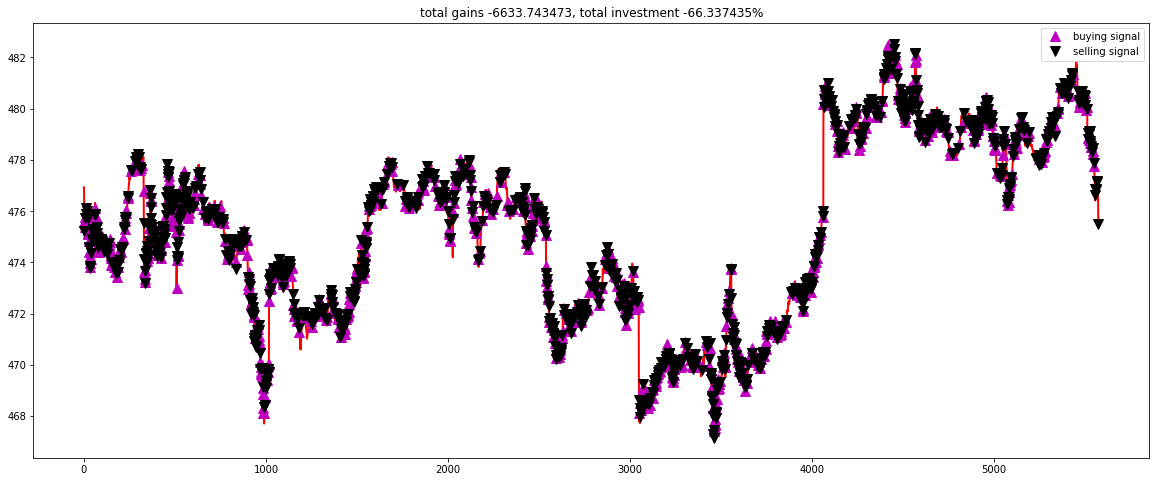

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

In [ ]:
df1_GSK = dataset_S1_GSK.drop(['ma7','upper_band','lower_band','ARIMA'],axis=1)
df1_GSK.head()

Dates   Close    High  ...        26ema        12ema          ema
0 2018-02-14 08:01:00  1292.8  1294.0  ...  1292.800000  1292.800000  1292.800000
1 2018-02-14 08:00:00  1288.8  1293.0  ...  1290.723077  1290.633333  1289.800000
2 2018-02-14 08:02:00  1286.4  1289.6  ...  1289.169837  1288.981062  1287.446154
3 2018-02-14 08:03:00  1287.8  1288.8  ...  1288.786891  1288.608247  1287.685000
4 2018-02-14 08:04:00  1287.4  1290.0  ...  1288.465265  1288.279971  1287.494215

[5 rows x 7 columns]

In [ ]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(df1_GSK) + 1, 1)

In [ ]:
cols_list = [
"High",
"Low",
"Close",
"26ema",
"12ema",
"ema"
]

for col in cols_list:
    OGSK_avg = get_mean(df1_GSK, col)
OGSK_avg.head(3)

Dates   Close    High  ...        12ema          ema     ema_mean
0 2018-02-14 08:01:00  1292.8  1294.0  ...  1292.800000  1292.800000  1292.700000
1 2018-02-14 08:00:00  1288.8  1293.0  ...  1290.633333  1289.800000  1290.292735
2 2018-02-14 08:02:00  1286.4  1289.6  ...  1288.981062  1287.446154  1287.932842

[3 rows x 8 columns]

In [ ]:
df1_GSK = OGSK_avg.drop(['High','Low','26ema','12ema'],axis=1)
df1_GSK.head(3)

Dates   Close          ema     ema_mean
0 2018-02-14 08:01:00  1292.8  1292.800000  1292.700000
1 2018-02-14 08:00:00  1288.8  1289.800000  1290.292735
2 2018-02-14 08:02:00  1286.4  1287.446154  1287.932842

In [ ]:
close = df1_GSK.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = PGAgent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: -162.265556.3, cost: -18988.544922, total money: 3256.305544
epoch: 20, total rewards: -80.004861.3, cost: -13083.936523, total money: 3333.206649
epoch: 30, total rewards: -8.553183.3, cost: -11268.030273, total money: 3404.658327
epoch: 40, total rewards: -15.121710.3, cost: -11780.744141, total money: 3398.089800
epoch: 50, total rewards: -65.611478.3, cost: -12891.057617, total money: 4673.619504
epoch: 60, total rewards: -19.425452.3, cost: -12894.854492, total money: 4720.285311
epoch: 70, total rewards: 4.507541.3, cost: -11329.042969, total money: 3434.218155
epoch: 80, total rewards: 27.598118.3, cost: -11001.184570, total money: 3457.308732
epoch: 90, total rewards: 0.932477.3, cost: -11344.205078, total money: 3430.643092
epoch: 100, total rewards: 43.237747.3, cost: -11177.268555, total money: 2151.848854
epoch: 110, total rewards: 56.584539.3, cost: -11732.596680, total money: 2163.870573
epoch: 120, total rewards: 92.091441.3, cost: -11424.959961

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 0: buy 1 unit at price 1292.700000, total balance 8707.300000
mins 2, sell 1 unit at price 1287.932842, investment -0.368775 %, total balance 9995.232842,
mins 4: buy 1 unit at price 1288.139908, total balance 8707.092934
mins 6: buy 1 unit at price 1286.195699, total balance 7420.897235
mins 8, sell 1 unit at price 1287.819369, investment -0.024884 %, total balance 8708.716604,
mins 11, sell 1 unit at price 1289.622934, investment 0.266463 %, total balance 9998.339537,
mins 13: buy 1 unit at price 1291.111990, total balance 8707.227548
mins 14, sell 1 unit at price 1292.087170, investment 0.075530 %, total balance 9999.314718,
mins 20: buy 1 unit at price 1294.397557, total balance 8704.917161
mins 21, sell 1 unit at price 1294.313395, investment -0.006502 %, total balance 9999.230555,
mins 22: buy 1 unit at price 1293.289968, total balance 8705.940587
mins 23, sell 1 unit at price 1293.243361, investment -0.003604 %, total balance 9999.183948,
mins 24: buy 1 unit at price 1293.5

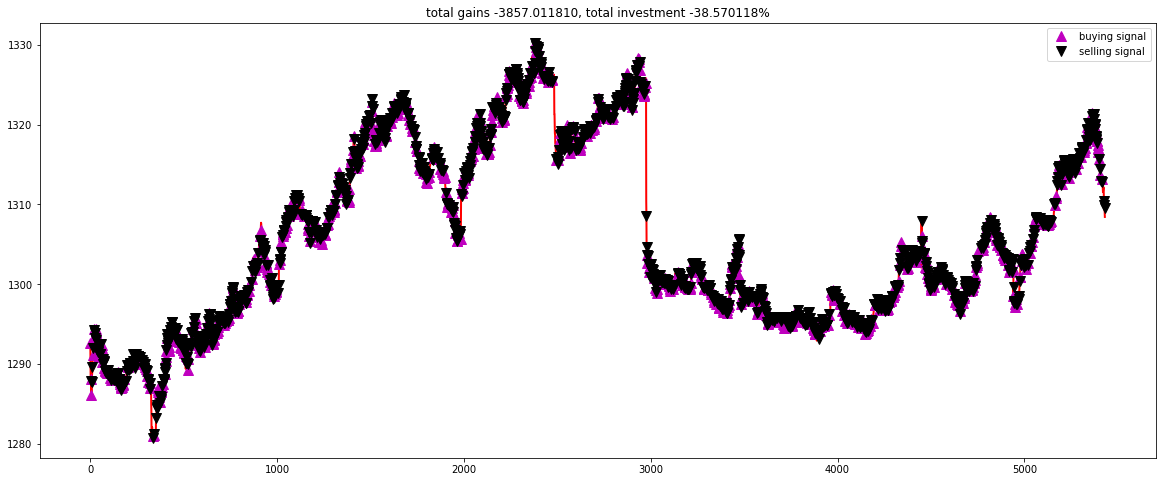

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**LLOY**

In [ ]:
dataset_S1_LLOY.head(3)

Dates   Open  Close  ...  upper_band  lower_band        ema
0 2018-02-14 08:00:00  67.00  67.07  ...         0.0         0.0  67.070000
1 2018-02-14 08:01:00  67.17  67.16  ...         0.0         0.0  67.137500
2 2018-02-14 08:02:00  67.10  66.98  ...         0.0         0.0  67.028462

[3 rows x 12 columns]

In [ ]:
df1_LLOY = dataset_S1_LLOY.drop(['ma7','ma21','upper_band','lower_band'],axis=1)
df1_LLOY.head(3)

Dates   Open  Close  ...      26ema      12ema        ema
0 2018-02-14 08:00:00  67.00  67.07  ...  67.070000  67.070000  67.070000
1 2018-02-14 08:01:00  67.17  67.16  ...  67.116731  67.118750  67.137500
2 2018-02-14 08:02:00  67.10  66.98  ...  67.067605  67.064596  67.028462

[3 rows x 8 columns]

In [ ]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(df1_LLOY) + 1, 1)

In [ ]:
cols_list = [
"Open",
"High",
"Low",
"Close",
"26ema",
"12ema",
"ema"
]

for col in cols_list:
    OLLOY_avg = get_mean(df1_LLOY, col)
OLLOY_avg.head(3)

Dates   Open  Close  ...      12ema        ema   ema_mean
0 2018-02-14 08:00:00  67.00  67.07  ...  67.070000  67.070000  67.047143
1 2018-02-14 08:01:00  67.17  67.16  ...  67.118750  67.137500  67.138997
2 2018-02-14 08:02:00  67.10  66.98  ...  67.064596  67.028462  67.038666

[3 rows x 9 columns]

In [ ]:
df1_LLOY = OLLOY_avg.drop(['Open','High','Low','26ema','12ema'],axis=1)
df1_LLOY.head(3)

Dates  Close        ema   ema_mean
0 2018-02-14 08:00:00  67.07  67.070000  67.047143
1 2018-02-14 08:01:00  67.16  67.137500  67.138997
2 2018-02-14 08:02:00  66.98  67.028462  67.038666

In [ ]:
close = df1_LLOY.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = PGAgent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 64.661455.3, cost: -29895.365234, total money: 9026.118695
epoch: 20, total rewards: 93.149095.3, cost: -27010.478516, total money: 7117.191743
epoch: 30, total rewards: 150.227849.3, cost: -19522.185547, total money: 3372.012384
epoch: 40, total rewards: 123.520035.3, cost: -24347.353516, total money: 5073.688642
epoch: 50, total rewards: 45.454646.3, cost: -32144.945312, total money: 9838.409390
epoch: 60, total rewards: 109.632962.3, cost: -24807.261719, total money: 5614.213410
epoch: 70, total rewards: 63.661550.3, cost: -32401.406250, total money: 8263.660598
epoch: 80, total rewards: 74.127821.3, cost: -31299.673828, total money: 8274.126870
epoch: 90, total rewards: 78.277513.3, cost: -31470.912109, total money: 8485.860034
epoch: 100, total rewards: 111.574019.3, cost: -29029.607422, total money: 8103.874756
epoch: 110, total rewards: 101.022379.3, cost: -28152.361328, total money: 6504.251885
epoch: 120, total rewards: 74.357244.3, cost: -31891.86914

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 1: buy 1 unit at price 67.138997, total balance 9932.861003
mins 2: buy 1 unit at price 67.038666, total balance 9865.822337
mins 3, sell 1 unit at price 66.923476, investment -0.321008 %, total balance 9932.745813,
mins 5: buy 1 unit at price 66.909885, total balance 9865.835928
mins 7: buy 1 unit at price 66.902252, total balance 9798.933675
mins 8, sell 1 unit at price 66.964899, investment -0.110036 %, total balance 9865.898574,
mins 9: buy 1 unit at price 66.967667, total balance 9798.930908
mins 10: buy 1 unit at price 66.950098, total balance 9731.980810
mins 12, sell 1 unit at price 66.867460, investment -0.063405 %, total balance 9798.848271,
mins 13, sell 1 unit at price 66.849485, investment -0.078872 %, total balance 9865.697756,
mins 15: buy 1 unit at price 66.770952, total balance 9798.926804
mins 17: buy 1 unit at price 66.817251, total balance 9732.109554
mins 18, sell 1 unit at price 66.847502, investment -0.179437 %, total balance 9798.957056,
mins 19: buy 1 unit

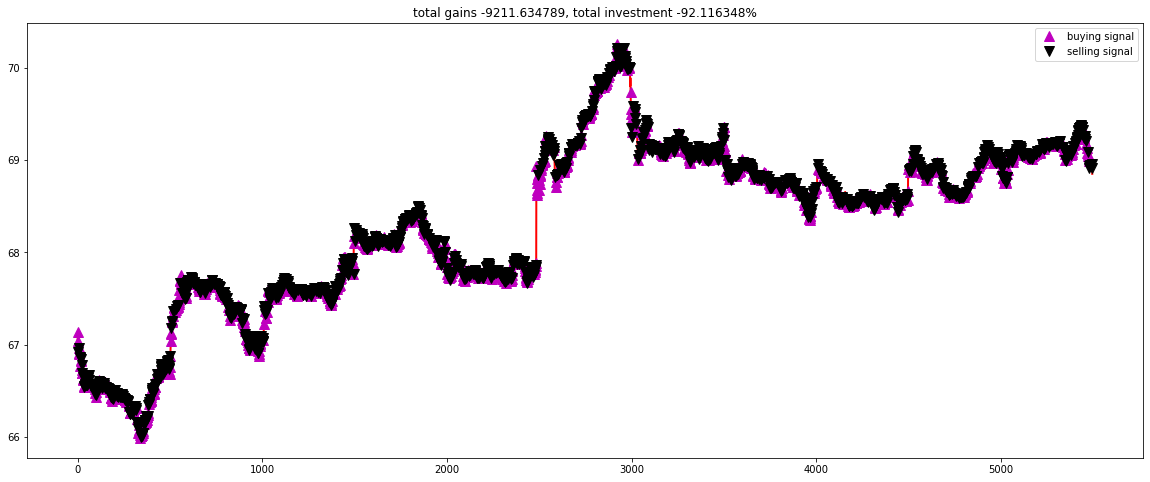

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**AZN**

In [ ]:
df1_AZN = dataset_S1_AZN.drop(['lower_band'],axis=1)
df1_AZN.head(3)

Dates    Open   Close    High     Low        26ema          ema
0 2018-02-14 08:00:00  4835.5  4832.5  4838.0  4832.5  4832.500000  4832.500000
1 2018-02-14 08:01:00  4832.5  4832.5  4832.5  4832.5  4832.500000  4832.500000
2 2018-02-14 08:02:00  4834.5  4830.0  4838.0  4830.0  4831.601774  4830.769231

In [ ]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(df1_AZN) + 1, 1)

In [ ]:
cols_list = [
"Open",
"High",
"Low",
"Close",
"26ema",
"ema"
]

for col in cols_list:
    OAZN_avg = get_mean(df1_AZN, col)
OAZN_avg.head(3)

Dates    Open   Close  ...        26ema          ema     ema_mean
0 2018-02-14 08:00:00  4835.5  4832.5  ...  4832.500000  4832.500000  4833.916667
1 2018-02-14 08:01:00  4832.5  4832.5  ...  4832.500000  4832.500000  4832.500000
2 2018-02-14 08:02:00  4834.5  4830.0  ...  4831.601774  4830.769231  4832.478501

[3 rows x 8 columns]

In [ ]:
df1_AZN = OAZN_avg.drop(['Open','High','Low','26ema'],axis=1)
df1_AZN.head(3)

Dates   Close          ema     ema_mean
0 2018-02-14 08:00:00  4832.5  4832.500000  4833.916667
1 2018-02-14 08:01:00  4832.5  4832.500000  4832.500000
2 2018-02-14 08:02:00  4830.0  4830.769231  4832.478501

In [ ]:
close = df1_AZN.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = PGAgent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: -181.529860.3, cost: -23441.181641, total money: 9818.470140
epoch: 20, total rewards: -288.839376.3, cost: -20664.144531, total money: 9711.160624
epoch: 30, total rewards: -316.475291.3, cost: -17589.080078, total money: 9683.524709
epoch: 40, total rewards: -326.986749.3, cost: -15913.429688, total money: 9673.013251
epoch: 50, total rewards: -287.004073.3, cost: -14619.507812, total money: 9712.995927
epoch: 60, total rewards: -304.696170.3, cost: -13911.280273, total money: 9695.303830
epoch: 70, total rewards: -288.809769.3, cost: -13587.252930, total money: 9711.190231
epoch: 80, total rewards: -337.634235.3, cost: -13402.079102, total money: 9662.365765
epoch: 90, total rewards: -299.148208.3, cost: -13062.270508, total money: 9700.851792
epoch: 100, total rewards: -282.904897.3, cost: -12731.606445, total money: 9717.095103
epoch: 110, total rewards: -190.211385.3, cost: -12664.003906, total money: 9809.788615
epoch: 120, total rewards: -186.547067.3,

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 0: buy 1 unit at price 4833.916667, total balance 5166.083333
mins 1: buy 1 unit at price 4832.500000, total balance 333.583333
mins 8, sell 1 unit at price 4833.693496, investment -0.004617 %, total balance 5167.276830,
mins 9: buy 1 unit at price 4834.518032, total balance 332.758798
mins 12, sell 1 unit at price 4828.598455, investment -0.080736 %, total balance 5161.357252,
mins 13: buy 1 unit at price 4827.987994, total balance 333.369258
mins 20, sell 1 unit at price 4830.633765, investment -0.080344 %, total balance 5164.003023,
mins 22: buy 1 unit at price 4831.923669, total balance 332.079355
mins 25, sell 1 unit at price 4832.620710, investment 0.095955 %, total balance 5164.700065,
mins 26, sell 1 unit at price 4833.801049, investment 0.038854 %, total balance 9998.501114,
mins 28: buy 1 unit at price 4839.464895, total balance 5159.036219
mins 29, sell 1 unit at price 4842.713990, investment 0.067137 %, total balance 10001.750208,
mins 30: buy 1 unit at price 4841.3812

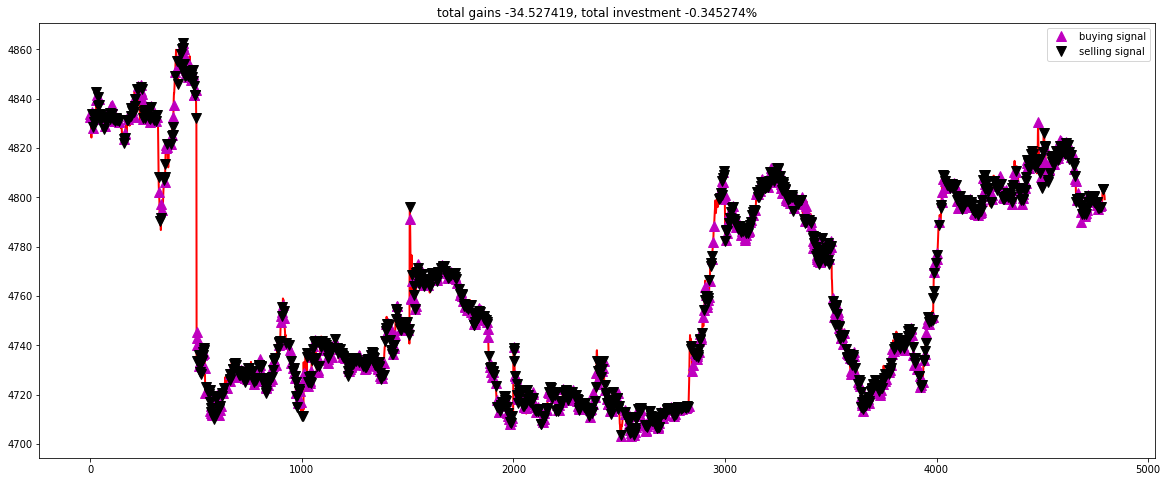

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**TSCO**

In [ ]:
dataset_S1_TSCO.head(3)

Dates   Open  Close   High  ma21       12ema  upper_band
0 2018-02-14 08:00:00  204.0  204.0  204.0   0.0  204.000000         0.0
1 2018-02-14 08:01:00  204.1  204.1  204.1   0.0  204.054167         0.0
2 2018-02-14 08:02:00  204.2  204.1  204.2   0.0  204.072055         0.0

In [ ]:
df1_TSCO = dataset_S1_TSCO.drop(['ma21','upper_band'],axis=1)
df1_TSCO.head(3)

Dates   Open  Close   High       12ema
0 2018-02-14 08:00:00  204.0  204.0  204.0  204.000000
1 2018-02-14 08:01:00  204.1  204.1  204.1  204.054167
2 2018-02-14 08:02:00  204.2  204.1  204.2  204.072055

In [ ]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(df1_TSCO) + 1, 1)

In [ ]:
cols_list = [
"Open",
"High",
"Close",
"12ema",
]

for col in cols_list:
    OTSCO_avg = get_mean(df1_TSCO, col)
OTSCO_avg.head(3)

Dates   Open  Close   High       12ema  12ema_mean
0 2018-02-14 08:00:00  204.0  204.0  204.0  204.000000  204.000000
1 2018-02-14 08:01:00  204.1  204.1  204.1  204.054167  204.088542
2 2018-02-14 08:02:00  204.2  204.1  204.2  204.072055  204.143014

In [ ]:
df1_TSCO['ema_mean'] = OTSCO_avg['12ema_mean']
df1_TSCO.head(3)

Dates   Open  Close   High       12ema    ema_mean
0 2018-02-14 08:00:00  204.0  204.0  204.0  204.000000  204.000000
1 2018-02-14 08:01:00  204.1  204.1  204.1  204.054167  204.088542
2 2018-02-14 08:02:00  204.2  204.1  204.2  204.072055  204.143014

In [ ]:
close = df1_TSCO.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = PGAgent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: -0.157799.3, cost: -34828.617188, total money: 9364.962670
epoch: 20, total rewards: 28.483040.3, cost: -33432.000000, total money: 10028.483040
epoch: 30, total rewards: 358.441488.3, cost: -9287.858398, total money: 6331.113864
epoch: 40, total rewards: 396.961804.3, cost: -3750.476318, total money: 1701.488289
epoch: 50, total rewards: 394.528590.3, cost: -2737.947754, total money: 1054.969750
epoch: 60, total rewards: 401.834949.3, cost: -2594.343262, total money: 848.764021
epoch: 70, total rewards: 406.743648.3, cost: -2696.572754, total money: 853.486215
epoch: 80, total rewards: 408.450204.3, cost: -2928.742188, total money: 856.028711
epoch: 90, total rewards: 406.897593.3, cost: -3123.114258, total money: 853.883862
epoch: 100, total rewards: 398.098050.3, cost: -3720.229736, total money: 1701.153367
epoch: 110, total rewards: 386.551880.3, cost: -3931.187744, total money: 2752.162727
epoch: 120, total rewards: 381.020209.3, cost: -4232.936523, total

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 0: buy 1 unit at price 204.000000, total balance 9796.000000
mins 1: buy 1 unit at price 204.088542, total balance 9591.911458
mins 2: buy 1 unit at price 204.143014, total balance 9387.768444
mins 3: buy 1 unit at price 203.863653, total balance 9183.904791
mins 4: buy 1 unit at price 203.828151, total balance 8980.076640
mins 5, sell 1 unit at price 203.796309, investment -0.099849 %, total balance 9183.872949,
mins 6: buy 1 unit at price 203.952711, total balance 8979.920238
mins 7: buy 1 unit at price 203.902145, total balance 8776.018093
mins 8: buy 1 unit at price 204.011613, total balance 8572.006480
mins 9, sell 1 unit at price 204.068887, investment -0.009630 %, total balance 8776.075367,
mins 10, sell 1 unit at price 204.129154, investment -0.006789 %, total balance 8980.204521,
mins 11: buy 1 unit at price 204.082861, total balance 8776.121661
mins 14: buy 1 unit at price 203.814024, total balance 8572.307637
mins 16: buy 1 unit at price 203.906337, total balance 8368.4

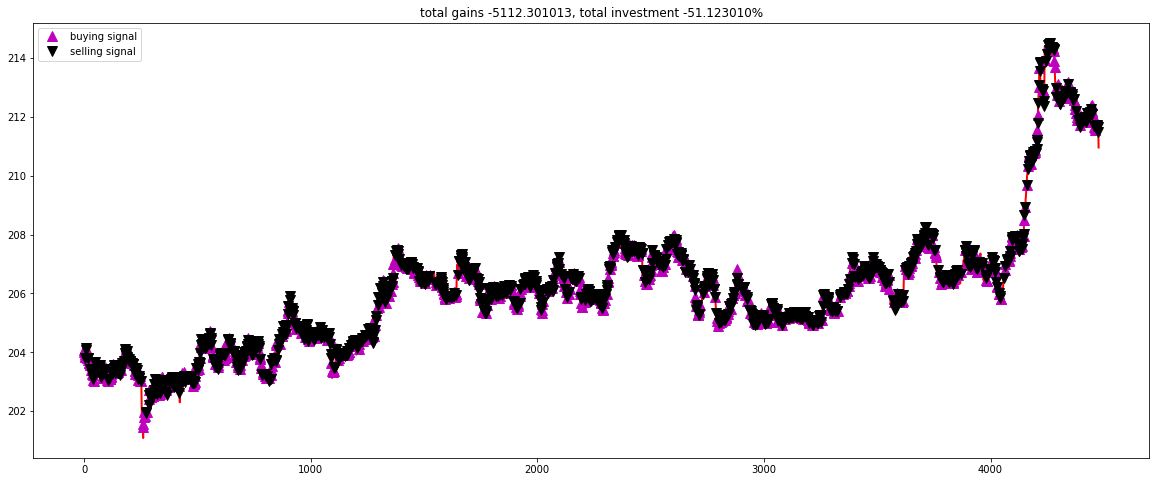

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**AAL**

In [ ]:
dataset_S1_AAL.head(3)

Dates    Open   Close  ...  upper_band  lower_band          ema
0 2018-02-14 08:00:00  1682.0  1679.8  ...         0.0         0.0  1679.800000
1 2018-02-14 08:01:00  1679.8  1680.8  ...         0.0         0.0  1680.550000
2 2018-02-14 08:02:00  1681.2  1679.0  ...         0.0         0.0  1679.476923

[3 rows x 13 columns]

In [ ]:
df1_AAL = dataset_S1_AAL.drop(['ma7','ma21','20sd','upper_band','lower_band'],axis=1)
df1_AAL.head(3)

Dates    Open   Close  ...        26ema        12ema          ema
0 2018-02-14 08:00:00  1682.0  1679.8  ...  1679.800000  1679.800000  1679.800000
1 2018-02-14 08:01:00  1679.8  1680.8  ...  1680.319231  1680.341667  1680.550000
2 2018-02-14 08:02:00  1681.2  1679.0  ...  1679.845244  1679.818014  1679.476923

[3 rows x 8 columns]

In [ ]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(df1_AAL) + 1, 1)

In [ ]:
cols_list = [
"Open",
"High",
"Close",
"Low",
"26ema",
"12ema",
"ema"
]

for col in cols_list:
    OAAL_avg = get_mean(df1_AAL, col)
OAAL_avg.head(3)

Dates    Open   Close  ...        12ema          ema     ema_mean
0 2018-02-14 08:00:00  1682.0  1679.8  ...  1679.800000  1679.800000  1680.114286
1 2018-02-14 08:01:00  1679.8  1680.8  ...  1680.341667  1680.550000  1680.201557
2 2018-02-14 08:02:00  1681.2  1679.0  ...  1679.818014  1679.476923  1679.791454

[3 rows x 9 columns]

In [ ]:
df1_AAL = OAAL_avg.drop(['Open','High','Low','26ema','12ema'],axis=1)
df1_AAL.head(3)

Dates   Close          ema     ema_mean
0 2018-02-14 08:00:00  1679.8  1679.800000  1680.114286
1 2018-02-14 08:01:00  1680.8  1680.550000  1680.201557
2 2018-02-14 08:02:00  1679.0  1679.476923  1679.791454

In [ ]:
close = df1_AAL.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = PGAgent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 301.198363.3, cost: -16992.966797, total money: 6712.211881
epoch: 20, total rewards: 409.272570.3, cost: -15901.699219, total money: 8614.855051
epoch: 30, total rewards: 350.462435.3, cost: -16537.267578, total money: 10350.462435
epoch: 40, total rewards: 227.750906.3, cost: -16487.566406, total money: 10227.750906
epoch: 50, total rewards: 315.454654.3, cost: -17056.630859, total money: 10315.454654
epoch: 60, total rewards: 157.110022.3, cost: -15847.781250, total money: 10157.110022
epoch: 70, total rewards: 307.662215.3, cost: -15899.348633, total money: 6718.137573
epoch: 80, total rewards: 219.835381.3, cost: -16112.244141, total money: 4834.361792
epoch: 90, total rewards: 309.823980.3, cost: -15467.262695, total money: 4924.350391
epoch: 100, total rewards: 312.551987.3, cost: -15301.778320, total money: 3126.338049
epoch: 110, total rewards: 317.683462.3, cost: -14949.802734, total money: 3130.333407
epoch: 120, total rewards: 407.516120.3, cost: -

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 6: buy 1 unit at price 1673.692652, total balance 8326.307348
mins 7, sell 1 unit at price 1674.745121, investment 0.062883 %, total balance 10001.052469,
mins 9: buy 1 unit at price 1672.836298, total balance 8328.216171
mins 11, sell 1 unit at price 1672.000132, investment -0.049985 %, total balance 10000.216302,
mins 12: buy 1 unit at price 1670.757764, total balance 8329.458538
mins 14: buy 1 unit at price 1673.541158, total balance 6655.917380
mins 16, sell 1 unit at price 1673.036115, investment 0.136366 %, total balance 8328.953495,
mins 17: buy 1 unit at price 1674.045455, total balance 6654.908039
mins 18, sell 1 unit at price 1675.298493, investment 0.105007 %, total balance 8330.206532,
mins 19: buy 1 unit at price 1674.864618, total balance 6655.341913
mins 21, sell 1 unit at price 1674.666816, investment 0.037117 %, total balance 8330.008730,
mins 22, sell 1 unit at price 1672.624422, investment -0.133754 %, total balance 10002.633152,
mins 23: buy 1 unit at price 167

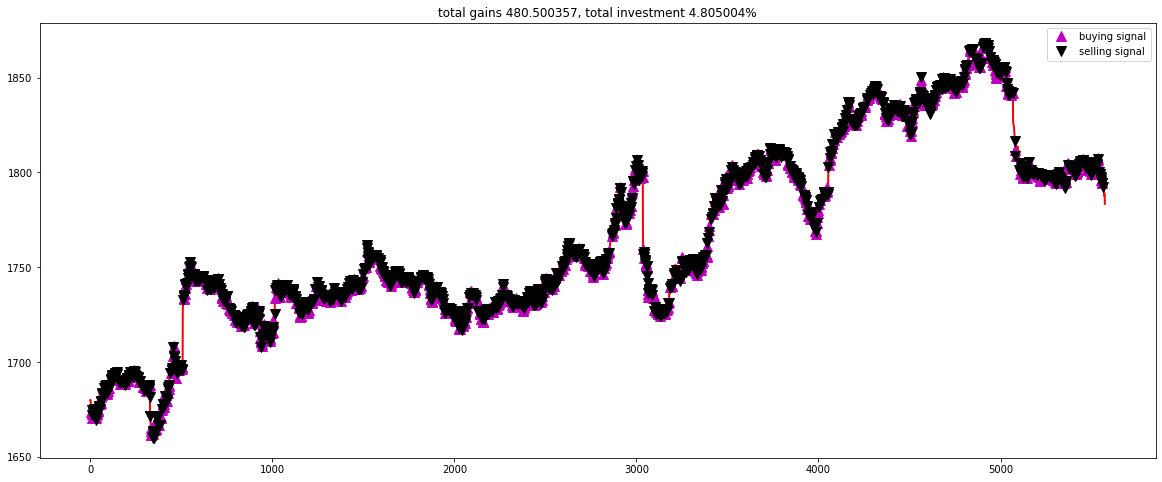

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**DGE**

In [ ]:
dataset_S1_DGE.head(3)

Dates   Close     Low  ...          ema  Fourier        ARIMA
0 2018-02-14 08:00:00  2473.0  2472.0  ...  2473.000000   2473.0  2460.993090
1 2018-02-14 08:01:00  2474.5  2474.0  ...  2474.125000   2474.5  2460.495066
2 2018-02-14 08:02:00  2475.0  2475.0  ...  2474.730769   2475.0  2460.487199

[3 rows x 10 columns]

In [ ]:
df1_DGE = dataset_S1_DGE.drop(['ma7','MACD','upper_band','lower_band','Fourier','ARIMA'],axis=1)
df1_DGE.head(3)

Dates   Close     Low          ema
0 2018-02-14 08:00:00  2473.0  2472.0  2473.000000
1 2018-02-14 08:01:00  2474.5  2474.0  2474.125000
2 2018-02-14 08:02:00  2475.0  2475.0  2474.730769

In [ ]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(df1_DGE) + 1, 1)

In [ ]:
cols_list = [
"Close",
"Low",
"ema"
]

for col in cols_list:
    ODGE_avg = get_mean(df1_DGE, col)
ODGE_avg.head(3)

Dates   Close     Low          ema     ema_mean
0 2018-02-14 08:00:00  2473.0  2472.0  2473.000000  2472.666667
1 2018-02-14 08:01:00  2474.5  2474.0  2474.125000  2474.208333
2 2018-02-14 08:02:00  2475.0  2475.0  2474.730769  2474.910256

In [ ]:
df1_DGE = ODGE_avg.drop(['Low'],axis=1)
df1_DGE.head(3)

Dates   Close          ema     ema_mean
0 2018-02-14 08:00:00  2473.0  2473.000000  2472.666667
1 2018-02-14 08:01:00  2474.5  2474.125000  2474.208333
2 2018-02-14 08:02:00  2475.0  2474.730769  2474.910256

In [ ]:
close = df1_DGE.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = PGAgent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 38.344730.3, cost: -2392.256348, total money: 2644.322954
epoch: 20, total rewards: 20.862576.3, cost: -3115.832275, total money: 2626.840800
epoch: 30, total rewards: 5.739813.3, cost: -4245.475098, total money: 2609.302797
epoch: 40, total rewards: 48.324953.3, cost: -5592.848633, total money: 2652.993645
epoch: 50, total rewards: 3.181230.3, cost: -6284.397949, total money: 5076.790810
epoch: 60, total rewards: -57.219674.3, cost: -7057.965820, total money: 9942.780326
epoch: 70, total rewards: -79.264986.3, cost: -8147.425293, total money: 9920.735014
epoch: 80, total rewards: -61.733655.3, cost: -8610.214844, total money: 9938.266345
epoch: 90, total rewards: -35.914525.3, cost: -8324.800781, total money: 9964.085475
epoch: 100, total rewards: -33.894673.3, cost: -8842.278320, total money: 9966.105327
epoch: 110, total rewards: -46.277131.3, cost: -9114.272461, total money: 9953.722869
epoch: 120, total rewards: -27.811720.3, cost: -9344.276367, total mon

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 1: buy 1 unit at price 2474.208333, total balance 7525.791667
mins 2, sell 1 unit at price 2474.910256, investment 0.028370 %, total balance 10000.701923,
mins 10: buy 1 unit at price 2473.447680, total balance 7527.254243
mins 11: buy 1 unit at price 2475.204783, total balance 5052.049460
mins 12: buy 1 unit at price 2476.346039, total balance 2575.703421
mins 13: buy 1 unit at price 2477.782013, total balance 97.921408
mins 18, sell 1 unit at price 2478.268650, investment 0.194909 %, total balance 2576.190058,
mins 19: buy 1 unit at price 2479.478439, total balance 96.711619
mins 22, sell 1 unit at price 2477.925127, investment 0.109904 %, total balance 2574.636747,
mins 23: buy 1 unit at price 2478.308376, total balance 96.328371
mins 29, sell 1 unit at price 2479.321411, investment 0.120152 %, total balance 2575.649782,
mins 32: buy 1 unit at price 2479.042768, total balance 96.607013
mins 35, sell 1 unit at price 2479.291707, investment 0.060929 %, total balance 2575.898721,


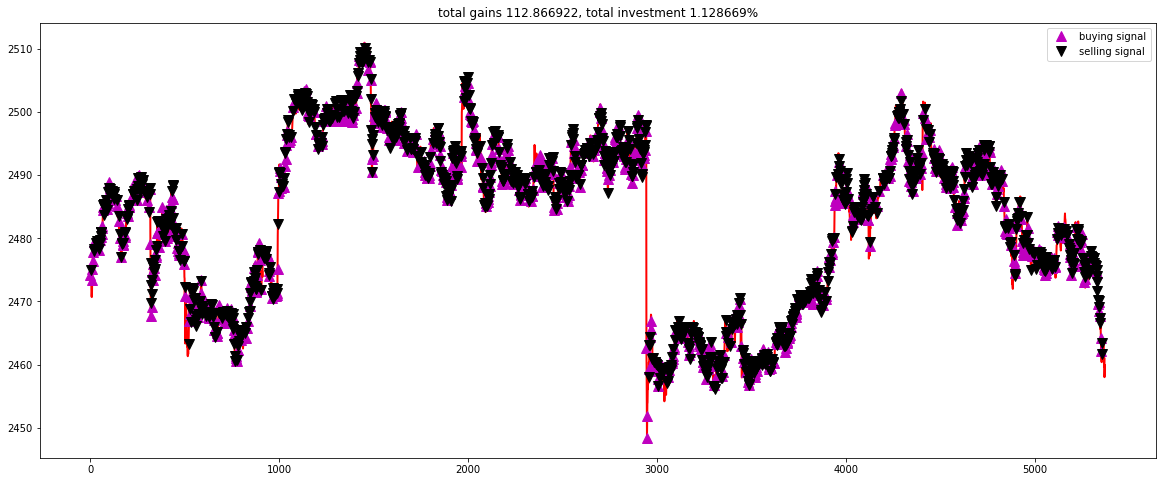

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

#Q-Learning

In [ ]:
from collections import deque
import random

name = 'Q-learning agent'

class QAgent:
    def __init__(self, state_size, window_size, trend, skip, batch_size):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.action_size = 3
        self.batch_size = batch_size
        self.memory = deque(maxlen = 1000)
        self.inventory = []

        self.gamma = 0.95
        self.epsilon = 0.5
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.999

        tf.reset_default_graph()
        self.sess = tf.InteractiveSession()
        self.X = tf.placeholder(tf.float32, [None, self.state_size])
        self.Y = tf.placeholder(tf.float32, [None, self.action_size])
        feed = tf.layers.dense(self.X, 256, activation = tf.nn.relu)
        self.logits = tf.layers.dense(feed, self.action_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.GradientDescentOptimizer(1e-5).minimize(
            self.cost
        )
        self.sess.run(tf.global_variables_initializer())

    def act(self, state):
        if random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        return np.argmax(
            self.sess.run(self.logits, feed_dict = {self.X: state})[0]
        )
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])

    def replay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size, l):
            mini_batch.append(self.memory[i])
        replay_size = len(mini_batch)
        X = np.empty((replay_size, self.state_size))
        Y = np.empty((replay_size, self.action_size))
        states = np.array([a[0][0] for a in mini_batch])
        new_states = np.array([a[3][0] for a in mini_batch])
        Q = self.sess.run(self.logits, feed_dict = {self.X: states})
        Q_new = self.sess.run(self.logits, feed_dict = {self.X: new_states})
        for i in range(len(mini_batch)):
            state, action, reward, next_state, done = mini_batch[i]
            target = Q[i]
            target[action] = reward
            if not done:
                target[action] += self.gamma * np.amax(Q_new[i])
            X[i] = state
            Y[i] = target
        cost, _ = self.sess.run(
            [self.cost, self.optimizer], feed_dict = {self.X: X, self.Y: Y}
        )
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return cost
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('mins %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
                
                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'mins %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                self.memory.append((state, action, invest, 
                                    next_state, starting_money < initial_money))
                state = next_state
                batch_size = min(self.batch_size, len(self.memory))
                cost = self.replay(batch_size)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

**RDSB**

In [ ]:
close = df1_RDSB.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = QAgent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: -56.097949.3, cost: 0.135748, total money: 5273.431915
epoch: 20, total rewards: 37.993196.3, cost: 0.018322, total money: 10037.993196
epoch: 30, total rewards: -33.046967.3, cost: 0.014378, total money: 9966.953033
epoch: 40, total rewards: -37.102975.3, cost: 0.014150, total money: 9962.897025
epoch: 50, total rewards: -26.600767.3, cost: 0.012886, total money: 9973.399233
epoch: 60, total rewards: -17.936549.3, cost: 0.012772, total money: 9982.063451
epoch: 70, total rewards: -17.723807.3, cost: 0.010099, total money: 9982.276193
epoch: 80, total rewards: -11.643373.3, cost: 0.009069, total money: 9988.356627
epoch: 90, total rewards: -15.905081.3, cost: 0.008378, total money: 9984.094919
epoch: 100, total rewards: -12.229953.3, cost: 0.007940, total money: 9987.770047
epoch: 110, total rewards: -2.750941.3, cost: 0.007221, total money: 9997.249059
epoch: 120, total rewards: 3.499832.3, cost: 0.010377, total money: 10003.499832
epoch: 130, total rewards: 

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 240: buy 1 unit at price 2305.015964, total balance 7694.984036
mins 242, sell 1 unit at price 2305.717897, investment 0.030452 %, total balance 10000.701933,
mins 251: buy 1 unit at price 2307.056687, total balance 7693.645246
mins 252, sell 1 unit at price 2307.119467, investment 0.002721 %, total balance 10000.764713,
mins 335: buy 1 unit at price 2291.449974, total balance 7709.314740
mins 336, sell 1 unit at price 2289.921665, investment -0.066696 %, total balance 9999.236404,
mins 364: buy 1 unit at price 2301.010515, total balance 7698.225890
mins 366, sell 1 unit at price 2301.249979, investment 0.010407 %, total balance 9999.475869,
mins 401: buy 1 unit at price 2303.695847, total balance 7695.780022
mins 402, sell 1 unit at price 2304.287689, investment 0.025691 %, total balance 10000.067711,
mins 469: buy 1 unit at price 2320.508633, total balance 7679.559078
mins 470, sell 1 unit at price 2321.976484, investment 0.063256 %, total balance 10001.535562,
mins 486: buy 1 u

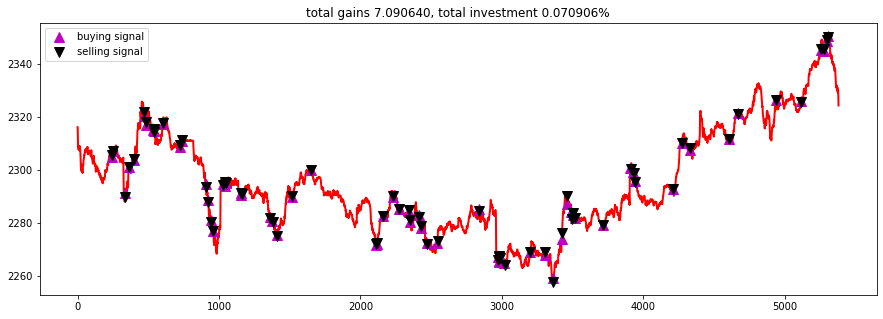

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**ULVR**

In [ ]:
close = df1_ULVR.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = QAgent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: -113.991141.3, cost: 0.071647, total money: 9886.008859
epoch: 20, total rewards: -44.156081.3, cost: 0.036169, total money: 9955.843919
epoch: 30, total rewards: -31.593447.3, cost: 0.022367, total money: 9968.406553
epoch: 40, total rewards: -26.956679.3, cost: 0.018976, total money: 9973.043321
epoch: 50, total rewards: -12.345980.3, cost: 0.016564, total money: 9987.654020
epoch: 60, total rewards: -3.274446.3, cost: 0.014531, total money: 9996.725554
epoch: 70, total rewards: -6.742635.3, cost: 0.012934, total money: 9993.257365
epoch: 80, total rewards: 4.228977.3, cost: 0.023810, total money: 10004.228977
epoch: 90, total rewards: -4.093493.3, cost: 0.010486, total money: 9995.906507
epoch: 100, total rewards: -7.720398.3, cost: 0.009657, total money: 9992.279602
epoch: 110, total rewards: -18.809015.3, cost: 0.008946, total money: 9981.190985
epoch: 120, total rewards: -9.536318.3, cost: 0.008255, total money: 9990.463682
epoch: 130, total rewards: -11

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 9: buy 1 unit at price 3802.444601, total balance 6197.555399
mins 12, sell 1 unit at price 3801.199082, investment -0.032756 %, total balance 9998.754481,
mins 65: buy 1 unit at price 3806.343376, total balance 6192.411105
mins 66, sell 1 unit at price 3806.699641, investment 0.009360 %, total balance 9999.110746,
mins 199: buy 1 unit at price 3814.644228, total balance 6184.466519
mins 200, sell 1 unit at price 3814.672321, investment 0.000736 %, total balance 9999.138839,
mins 539: buy 1 unit at price 3767.165965, total balance 6231.972874
mins 540, sell 1 unit at price 3766.868938, investment -0.007885 %, total balance 9998.841812,
mins 641: buy 1 unit at price 3752.542182, total balance 6246.299630
mins 642, sell 1 unit at price 3752.048973, investment -0.013143 %, total balance 9998.348603,
mins 685: buy 1 unit at price 3749.507399, total balance 6248.841204
mins 686, sell 1 unit at price 3748.624937, investment -0.023535 %, total balance 9997.466141,
mins 820: buy 1 unit at

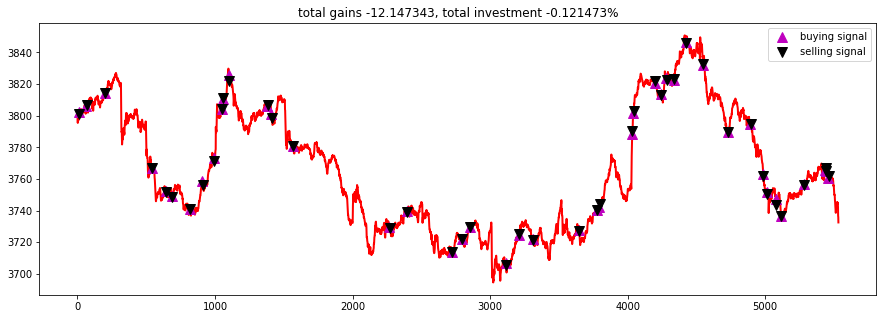

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**HSBC**

In [ ]:
close = df1_HSBC.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = QAgent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: -134.973687.3, cost: 0.000928, total money: 9865.026313
epoch: 20, total rewards: -65.747616.3, cost: 0.001058, total money: 9934.252384
epoch: 30, total rewards: -62.812467.3, cost: 0.000957, total money: 9937.187533
epoch: 40, total rewards: -45.318054.3, cost: 0.000890, total money: 9954.681946
epoch: 50, total rewards: -19.775776.3, cost: 0.000938, total money: 9980.224224
epoch: 60, total rewards: -16.243448.3, cost: 0.000698, total money: 9983.756552
epoch: 70, total rewards: -19.123609.3, cost: 0.000601, total money: 9980.876391
epoch: 80, total rewards: -16.158428.3, cost: 0.000525, total money: 9983.841572
epoch: 90, total rewards: -17.174910.3, cost: 0.000481, total money: 9982.825090
epoch: 100, total rewards: -15.471425.3, cost: 0.000450, total money: 9984.528575
epoch: 110, total rewards: -16.872631.3, cost: 0.000434, total money: 9983.127369
epoch: 120, total rewards: -14.625820.3, cost: 0.000487, total money: 9985.374180
epoch: 130, total reward

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 97: buy 1 unit at price 750.936079, total balance 9249.063921
mins 98, sell 1 unit at price 750.980756, investment 0.005949 %, total balance 10000.044677,
mins 101: buy 1 unit at price 751.106325, total balance 9248.938352
mins 102, sell 1 unit at price 751.270231, investment 0.021822 %, total balance 10000.208582,
mins 341: buy 1 unit at price 748.762636, total balance 9251.445946
mins 344, sell 1 unit at price 748.668372, investment -0.012589 %, total balance 10000.114318,
mins 350: buy 1 unit at price 748.477944, total balance 9251.636374
mins 351, sell 1 unit at price 748.614972, investment 0.018308 %, total balance 10000.251346,
mins 382: buy 1 unit at price 749.418984, total balance 9250.832362
mins 383: buy 1 unit at price 749.454740, total balance 8501.377622
mins 384, sell 1 unit at price 749.599904, investment 0.024141 %, total balance 9250.977526,
mins 385, sell 1 unit at price 749.476605, investment 0.002917 %, total balance 10000.454131,
mins 392: buy 1 unit at price 

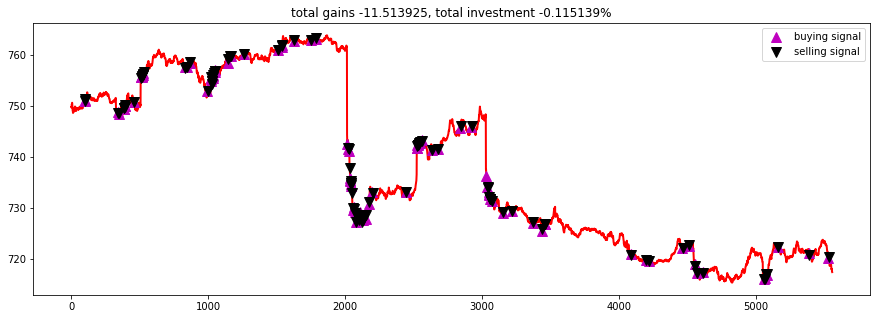

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**BP**

In [ ]:
close = df1_BP.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = QAgent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: -6.973708.3, cost: 0.002086, total money: 9993.026292
epoch: 20, total rewards: -11.092955.3, cost: 0.001458, total money: 9988.907045
epoch: 30, total rewards: -9.128273.3, cost: 0.001087, total money: 9990.871727
epoch: 40, total rewards: -11.215777.3, cost: 0.000880, total money: 9988.784223
epoch: 50, total rewards: -8.902875.3, cost: 0.000765, total money: 9991.097125
epoch: 60, total rewards: -9.013172.3, cost: 0.000704, total money: 9990.986828
epoch: 70, total rewards: -9.430106.3, cost: 0.001256, total money: 9990.569894
epoch: 80, total rewards: -14.649021.3, cost: 0.000818, total money: 9985.350979
epoch: 90, total rewards: -14.468905.3, cost: 0.000624, total money: 9985.531095
epoch: 100, total rewards: -10.247971.3, cost: 0.000612, total money: 9989.752029
epoch: 110, total rewards: -11.312971.3, cost: 0.000598, total money: 9988.687029
epoch: 120, total rewards: -10.232454.3, cost: 0.000747, total money: 9989.767546
epoch: 130, total rewards: -12

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 40: buy 1 unit at price 474.424361, total balance 9525.575639
mins 42, sell 1 unit at price 474.861568, investment 0.092155 %, total balance 10000.437207,
mins 46: buy 1 unit at price 474.937550, total balance 9525.499657
mins 47, sell 1 unit at price 475.125261, investment 0.039523 %, total balance 10000.624918,
mins 53: buy 1 unit at price 475.582978, total balance 9525.041941
mins 54, sell 1 unit at price 475.524646, investment -0.012265 %, total balance 10000.566587,
mins 81: buy 1 unit at price 474.581166, total balance 9525.985421
mins 82, sell 1 unit at price 474.564449, investment -0.003523 %, total balance 10000.549870,
mins 89: buy 1 unit at price 474.906117, total balance 9525.643752
mins 90, sell 1 unit at price 474.880871, investment -0.005316 %, total balance 10000.524623,
mins 116: buy 1 unit at price 474.833436, total balance 9525.691187
mins 117, sell 1 unit at price 474.650823, investment -0.038458 %, total balance 10000.342010,
mins 125: buy 1 unit at price 474.

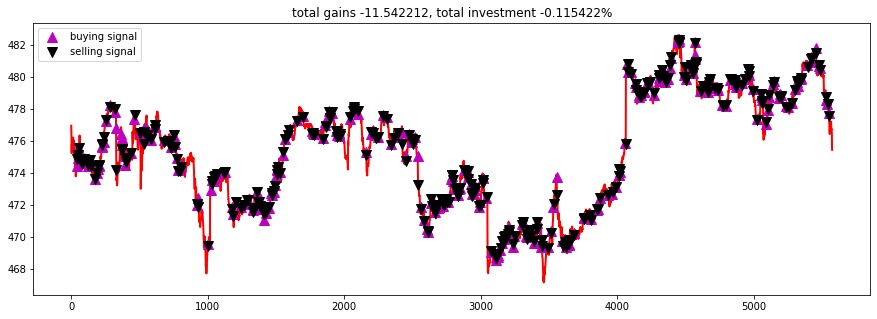

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**GSK**

In [ ]:
close = df1_GSK.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = QAgent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
epoch: 10, total rewards: -13.358135.3, cost: 0.005682, total money: 9986.641865
epoch: 20, total rewards: 5.348380.3, cost: 0.006983, total money: 10005.348380
epoch: 30, total rewards: -18.003468.3, cost: 0.009504, total money: 9981.996532
epoch: 40, total rewards: -60.725561.3, cost: 0.007926, total money: 9939.274439
epoch: 50, total rewards: -31.549928.3, cost: 0.006768, total money: 9968.450072
epoch: 60, total rewards: -18.775171.3, cost: 0.005695, total money: 9981.224829
epoch: 70, total rewards: -23.164483.3, cost: 0.004824, total money: 9976.835517
epoch: 80, total rewards: -12.626350.3, cost: 0.004289, total money: 9987.373650
epoch: 90, total rewards: -17.314746.3, cost: 0.003840, total money: 9982.685254
epoch: 100, total rewards: -21.301537.3, cost: 0.003483, total money: 9978.698463
epoch: 110, t

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 2: buy 1 unit at price 1287.932842, total balance 8712.067158
mins 5, sell 1 unit at price 1287.036033, investment -0.069632 %, total balance 9999.103191,
mins 12: buy 1 unit at price 1290.254783, total balance 8708.848408
mins 14, sell 1 unit at price 1292.087170, investment 0.142017 %, total balance 10000.935578,
mins 21: buy 1 unit at price 1294.313395, total balance 8706.622183
mins 22, sell 1 unit at price 1293.289968, investment -0.079071 %, total balance 9999.912152,
mins 24: buy 1 unit at price 1293.572631, total balance 8706.339521
mins 25, sell 1 unit at price 1293.662360, investment 0.006937 %, total balance 10000.001881,
mins 28: buy 1 unit at price 1293.860275, total balance 8706.141606
mins 29, sell 1 unit at price 1294.449276, investment 0.045523 %, total balance 10000.590883,
mins 33: buy 1 unit at price 1292.767183, total balance 8707.823700
mins 34, sell 1 unit at price 1292.435586, investment -0.025650 %, total balance 10000.259286,
mins 59: buy 1 unit at price 

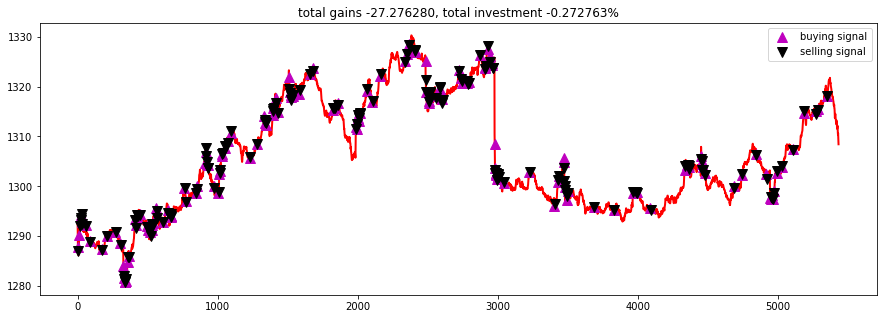

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**LLOY**

In [ ]:
close = df1_LLOY.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = QAgent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 16.558708.3, cost: 0.000040, total money: 10016.558708
epoch: 20, total rewards: 14.910476.3, cost: 0.000025, total money: 10014.910476
epoch: 30, total rewards: 9.460577.3, cost: 0.000024, total money: 10009.460577
epoch: 40, total rewards: 12.430547.3, cost: 0.000018, total money: 10012.430547
epoch: 50, total rewards: 12.265451.3, cost: 0.000017, total money: 10012.265451
epoch: 60, total rewards: 12.366915.3, cost: 0.000017, total money: 10012.366915
epoch: 70, total rewards: 13.717675.3, cost: 0.000017, total money: 10013.717675
epoch: 80, total rewards: 12.073976.3, cost: 0.000017, total money: 10012.073976
epoch: 90, total rewards: 14.606603.3, cost: 0.000017, total money: 10014.606603
epoch: 100, total rewards: 11.858631.3, cost: 0.000016, total money: 10011.858631
epoch: 110, total rewards: 10.839619.3, cost: 0.000022, total money: 10010.839619
epoch: 120, total rewards: 10.300504.3, cost: 0.000016, total money: 10010.300504
epoch: 130, total rewards:

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 7: buy 1 unit at price 66.902252, total balance 9933.097748
mins 8: buy 1 unit at price 66.964899, total balance 9866.132849
mins 9: buy 1 unit at price 66.967667, total balance 9799.165182
mins 11, sell 1 unit at price 66.913315, investment 0.016536 %, total balance 9866.078497,
mins 12, sell 1 unit at price 66.867460, investment -0.145507 %, total balance 9932.945957,
mins 14, sell 1 unit at price 66.792353, investment -0.261789 %, total balance 9999.738310,
mins 15: buy 1 unit at price 66.770952, total balance 9932.967359
mins 16: buy 1 unit at price 66.769449, total balance 9866.197910
mins 17, sell 1 unit at price 66.817251, investment 0.069340 %, total balance 9933.015160,
mins 19: buy 1 unit at price 66.829576, total balance 9866.185584
mins 20: buy 1 unit at price 66.824046, total balance 9799.361539
mins 23, sell 1 unit at price 66.691458, investment -0.116807 %, total balance 9866.052996,
mins 24, sell 1 unit at price 66.690229, investment -0.208510 %, total balance 9932

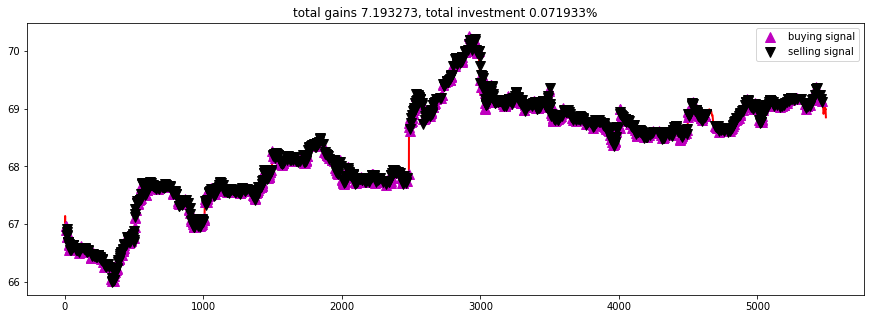

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**AZN**

In [ ]:
close = df1_AZN.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = QAgent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 74.083569.3, cost: 0.013673, total money: 10074.083569
epoch: 20, total rewards: 25.187061.3, cost: 0.007009, total money: 10025.187061
epoch: 30, total rewards: 57.130467.3, cost: 0.006702, total money: 10057.130467
epoch: 40, total rewards: 11.057317.3, cost: 0.006091, total money: 10011.057317
epoch: 50, total rewards: 6.705945.3, cost: 0.005711, total money: 10006.705945
epoch: 60, total rewards: 34.011324.3, cost: 0.005374, total money: 10034.011324
epoch: 70, total rewards: 12.453540.3, cost: 0.005088, total money: 10012.453540
epoch: 80, total rewards: 13.165952.3, cost: 0.012031, total money: 10013.165952
epoch: 90, total rewards: -8.556785.3, cost: 0.003974, total money: 9991.443215
epoch: 100, total rewards: -7.620275.3, cost: 0.004115, total money: 9992.379725
epoch: 110, total rewards: 15.500632.3, cost: 0.004551, total money: 10015.500632
epoch: 120, total rewards: 3.515484.3, cost: 0.004588, total money: 10003.515484
epoch: 130, total rewards: -2

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 34: buy 1 unit at price 4837.045604, total balance 5162.954396
mins 37, sell 1 unit at price 4837.128793, investment 0.001720 %, total balance 10000.083188,
mins 87: buy 1 unit at price 4831.839069, total balance 5168.244120
mins 88, sell 1 unit at price 4833.089779, investment 0.025885 %, total balance 10001.333899,
mins 119: buy 1 unit at price 4831.411393, total balance 5169.922506
mins 120, sell 1 unit at price 4832.287768, investment 0.018139 %, total balance 10002.210274,
mins 198: buy 1 unit at price 4834.299518, total balance 5167.910756
mins 199, sell 1 unit at price 4834.289343, investment -0.000210 %, total balance 10002.200099,
mins 217: buy 1 unit at price 4839.965614, total balance 5162.234486
mins 218, sell 1 unit at price 4840.326581, investment 0.007458 %, total balance 10002.561066,
mins 276: buy 1 unit at price 4834.078122, total balance 5168.482944
mins 277, sell 1 unit at price 4835.331315, investment 0.025924 %, total balance 10003.814259,
mins 348: buy 1 uni

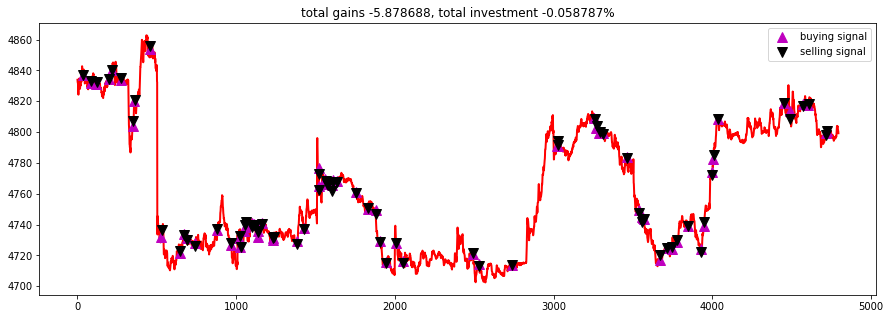

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**TSCO**

In [ ]:
close = df1_TSCO.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = QAgent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 51.084379.3, cost: 0.007863, total money: 9203.914506
epoch: 20, total rewards: 61.339501.3, cost: 0.000290, total money: 10061.339501
epoch: 30, total rewards: 87.876055.3, cost: 0.000294, total money: 10087.876055
epoch: 40, total rewards: 93.389564.3, cost: 0.000371, total money: 10093.389564
epoch: 50, total rewards: 100.308373.3, cost: 0.000395, total money: 10100.308373
epoch: 60, total rewards: 94.151227.3, cost: 0.000397, total money: 10094.151227
epoch: 70, total rewards: 90.294818.3, cost: 0.000400, total money: 10090.294818
epoch: 80, total rewards: 84.271430.3, cost: 0.000395, total money: 10084.271430
epoch: 90, total rewards: 86.519173.3, cost: 0.000363, total money: 10086.519173
epoch: 100, total rewards: 73.586471.3, cost: 0.000380, total money: 10073.586471
epoch: 110, total rewards: 74.997624.3, cost: 0.000379, total money: 10074.997624
epoch: 120, total rewards: 62.081641.3, cost: 0.000360, total money: 10062.081641
epoch: 130, total rewards

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 275: buy 1 unit at price 201.872807, total balance 9798.127193
mins 276: buy 1 unit at price 201.923144, total balance 9596.204050
mins 277, sell 1 unit at price 201.927276, investment 0.026982 %, total balance 9798.131325,
mins 278, sell 1 unit at price 201.980772, investment 0.028539 %, total balance 10000.112097,
mins 281: buy 1 unit at price 201.877404, total balance 9798.234693
mins 282: buy 1 unit at price 201.823188, total balance 9596.411504
mins 286: buy 1 unit at price 202.396258, total balance 9394.015246
mins 287: buy 1 unit at price 202.544911, total balance 9191.470336
mins 288: buy 1 unit at price 202.722617, total balance 8988.747719
mins 290, sell 1 unit at price 202.597850, investment 0.356873 %, total balance 9191.345569,
mins 291, sell 1 unit at price 202.605873, investment 0.387807 %, total balance 9393.951442,
mins 292, sell 1 unit at price 202.483816, investment 0.043260 %, total balance 9596.435257,
mins 293, sell 1 unit at price 202.486305, investment -0.0

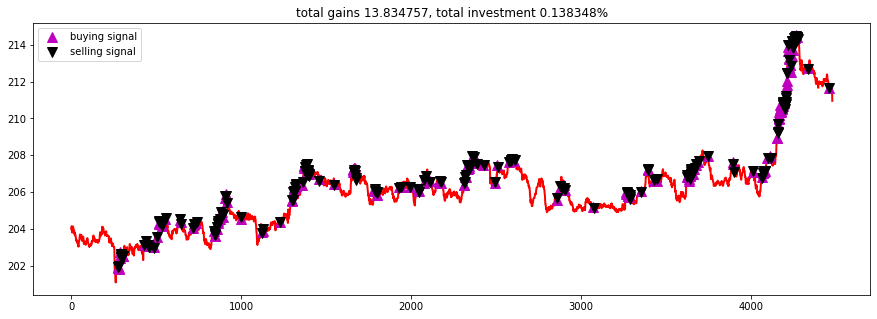

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**AAL**

In [ ]:
close = df1_AAL.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = QAgent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 148.109237.3, cost: 0.017731, total money: 10148.109237
epoch: 20, total rewards: 159.195067.3, cost: 0.009751, total money: 10159.195067
epoch: 30, total rewards: 150.741548.3, cost: 0.007604, total money: 10150.741548
epoch: 40, total rewards: 123.523487.3, cost: 0.007351, total money: 10123.523487
epoch: 50, total rewards: 105.685071.3, cost: 0.016308, total money: 10105.685071
epoch: 60, total rewards: 107.853463.3, cost: 0.007395, total money: 10107.853463
epoch: 70, total rewards: 118.038148.3, cost: 0.007556, total money: 10118.038148
epoch: 80, total rewards: 108.481293.3, cost: 0.007546, total money: 10108.481293
epoch: 90, total rewards: 109.899720.3, cost: 0.007623, total money: 10109.899720
epoch: 100, total rewards: 95.380481.3, cost: 0.007586, total money: 10095.380481
epoch: 110, total rewards: 94.925883.3, cost: 0.007802, total money: 10094.925883
epoch: 120, total rewards: 96.854707.3, cost: 0.007866, total money: 10096.854707
epoch: 130, tota

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

mins 21: buy 1 unit at price 1674.666816, total balance 8325.333184
mins 22, sell 1 unit at price 1672.624422, investment -0.121958 %, total balance 9997.957606,
mins 53: buy 1 unit at price 1675.778628, total balance 8322.178977
mins 54, sell 1 unit at price 1676.596721, investment 0.048819 %, total balance 9998.775699,
mins 81: buy 1 unit at price 1686.679062, total balance 8312.096636
mins 82, sell 1 unit at price 1687.580332, investment 0.053435 %, total balance 9999.676969,
mins 85: buy 1 unit at price 1687.484244, total balance 8312.192725
mins 86, sell 1 unit at price 1686.640299, investment -0.050012 %, total balance 9998.833023,
mins 89: buy 1 unit at price 1686.196305, total balance 8312.636719
mins 90, sell 1 unit at price 1685.632950, investment -0.033410 %, total balance 9998.269668,
mins 114: buy 1 unit at price 1691.354438, total balance 8306.915230
mins 115, sell 1 unit at price 1692.579805, investment 0.072449 %, total balance 9999.495035,
mins 174: buy 1 unit at price

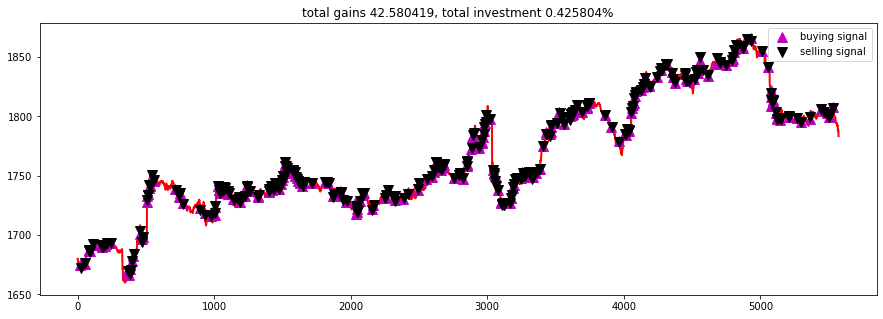

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

**DGE**

In [ ]:
close = df1_DGE.ema_mean.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = QAgent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

#LSTM-PPO

In [ ]:
https://github.com/q-learning-trader/reinforcement-learning-trading-robot

#Q-Learning 

In [ ]:
https://github.com/q-learning-trader/q-trading-pytorch/blob/master/visualize.ipynb